Student name: Matthew Noonan

Student pace: self paced 

Scheduled project review date/time:

Instructor name: Abhineet Kulkarni

Blog post URL:

# Business Case

For this project, we are assuming the role of developers of a new app/service called appraiseMe. This is an appraisal app
in which users enter in information about their home and receive a reasonable (but rough) estimate on the value of their 
property. Central to this is a well-developed regression model that is trained on real-world sales data. The idea is that
if the model can accurately predict past sales prices, then it should be able to predict current and future sales prices too. Our presentation will take the form of a product pitch. In question is

1. How does the product work?
2. Is it accurate?
3. Does it add value to the user's experience?

We've touched briefly on number one. Basically, it uses the regression model we're developing here to predict sales price from user input data against a database of sales information of already completed sales.

As for it's accuracy, that's what we're developing here. While it's not amazingly accurate yet, with more data to feed into the model, it could become much more accurate.

Value added would be mainly from ease of use, convenience, and whatever user experience develops for it. It is easier to use than googling the information, and it's customizeable to the user's own property information. 

Ideally, the user would input only a few key datapoints, the app would plug those into its equation and return the estimated price. The biggest question then becomes which 

Our audience here is a group of potential investors who may be less interested in the code than they are potential return on investment.

# Data Understanding

Data is taken from a file of home sales in Washington state's Kings County from years 2014-2015. The features include:

* `id` - Unique identifier for a house

* `date` - Date house was sold

* `price` - Sale price (prediction target)

* `bedrooms` - Number of bedrooms

* `bathrooms` - Number of bathrooms

* `sqft_living` - Square footage of living space in the home

* `sqft_lot` - Square footage of the lot

* `floors` - Number of floors (levels) in house

* `waterfront` - Whether the house is on a waterfront. Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts

* `view` - Quality of view from house. Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other

* `condition` - How good the overall condition of the house is. Related to maintenance of house.
 
* `grade` - Overall grade of the house. Related to the construction and design of the house.
 
* `sqft_above` - Square footage of house apart from basement

* `sqft_basement` - Square footage of the basement

* `yr_built` - Year when house was built

* `yr_renovated` - Year when house was renovated

* `zipcode` - ZIP Code used by the United States Postal Service

* `lat` - Latitude coordinate

* `long` - Longitude coordinate

* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors

* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

We will be exploring all of them first and then whitling them down as relevance or predictive strength dictate. At this stage in the product development life cycle, we are unlikely to be too interested in geographic information, so lat, long, and probably zipcode will be stricken. Though on that last one, we might have to play with it a bit.


# Import relevant libraries

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Import Data and Initial Exploration

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()
df.info()
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


The data consists of 21 features, of which four are categorical. At first glance there don't appear to be too many outliers, but there are NaN's present. The overall strategy for preprocessing will be as follows:

1. Find and scrub NaN's. 
2. Turn categorical columns into either binary or dummies.
3. Create new features as needed.
4. Check correlation with price to aid in baseline model creation.

After preprocessing, we will use statsmodels to optimize a regression model, then sklearn to train and test that regression model. We will attempt to answer, in particular, several questions using this model including which feature contributes or detracts the greatest from sale price, and what is the minimum number of features required to acheive a reasonably accurate result?

# Preprocessing

In [4]:
update_df = df.drop([df.index[15856]])
df = update_df

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df['waterfront'].fillna('NO',inplace=True)
df['waterfront'].value_counts()

NO     21450
YES      146
Name: waterfront, dtype: int64

We will fill the waterfront NaNs with 'NO', since it's assumed, given the selling point, the presence of a waterfront would not be missed or ignored. The get_dummies function will convert it to numerical values anyway.

In [8]:
df['view'].value_counts(dropna=False)
df['view'].fillna('NONE',inplace=True)


NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64

We will do the same for view.

In [9]:
df['yr_renovated'].value_counts(dropna=False)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

0.00       17010
NaN         3842
2014.00       73
2003.00       31
2013.00       31
           ...  
1971.00        1
1953.00        1
1944.00        1
1976.00        1
1946.00        1
Name: yr_renovated, Length: 71, dtype: int64

In [10]:
def recent_renovation(year):
    if year >= 1990:
        return 1
    else:
        return 0
    
df['recent_reno'] = df['yr_renovated'].apply(recent_renovation)

In [11]:
df['recent_reno'].value_counts()
df.drop('yr_renovated', axis=1, inplace=True)

0    21074
1      522
Name: recent_reno, dtype: int64

In [12]:
df 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,recent_reno
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NO,NONE,...,7 Average,1180,0.0,1955,98178,47.51,-122.26,1340,5650,0
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.72,-122.32,1690,7639,1
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.74,-122.23,2720,8062,0
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,98136,47.52,-122.39,1360,5000,0
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,98074,47.62,-122.05,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,98103,47.70,-122.35,1530,1509,0
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,98146,47.51,-122.36,1830,7200,0
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,98144,47.59,-122.30,1020,2007,0
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NO,NONE,...,8 Good,1600,0.0,2004,98027,47.53,-122.07,1410,1287,0


Here we've made 'yr_renovated' into a binary feature that indicates whether or not the property has been renovated in the last 30 or so years.

We will also create a new feature from the 'yr_built' column, called 'age', which is exactly as it sounds.

In [13]:
df['age'] = 2022 - df['yr_built']
df = df.drop('yr_built', axis=1)

In [14]:
df = df.drop(columns=['id','date','sqft_basement'],axis=1)


In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,recent_reno,age
count,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00
mean,540291.96,3.37,2.12,2080.34,15099.83,1.49,1788.63,98077.95,47.56,-122.21,1986.65,12758.66,0.02,51.00
std,367376.02,0.90,0.77,918.12,41413.55,0.54,827.76,53.51,0.14,0.14,685.23,27275.02,0.15,29.38
min,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,98001.00,47.16,-122.52,399.00,651.00,0.00,7.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,98033.00,47.47,-122.33,1490.00,5100.00,0.00,25.00
50%,450000.00,3.00,2.25,1910.00,7619.00,1.50,1560.00,98065.00,47.57,-122.23,1840.00,7620.00,0.00,47.00
75%,645000.00,4.00,2.50,2550.00,10685.50,2.00,2210.00,98118.00,47.68,-122.12,2360.00,10083.00,0.00,71.00
max,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,9410.00,98199.00,47.78,-121.31,6210.00,871200.00,1.00,122.00


<Figure size 1008x792 with 0 Axes>

<Figure size 1008x792 with 0 Axes>

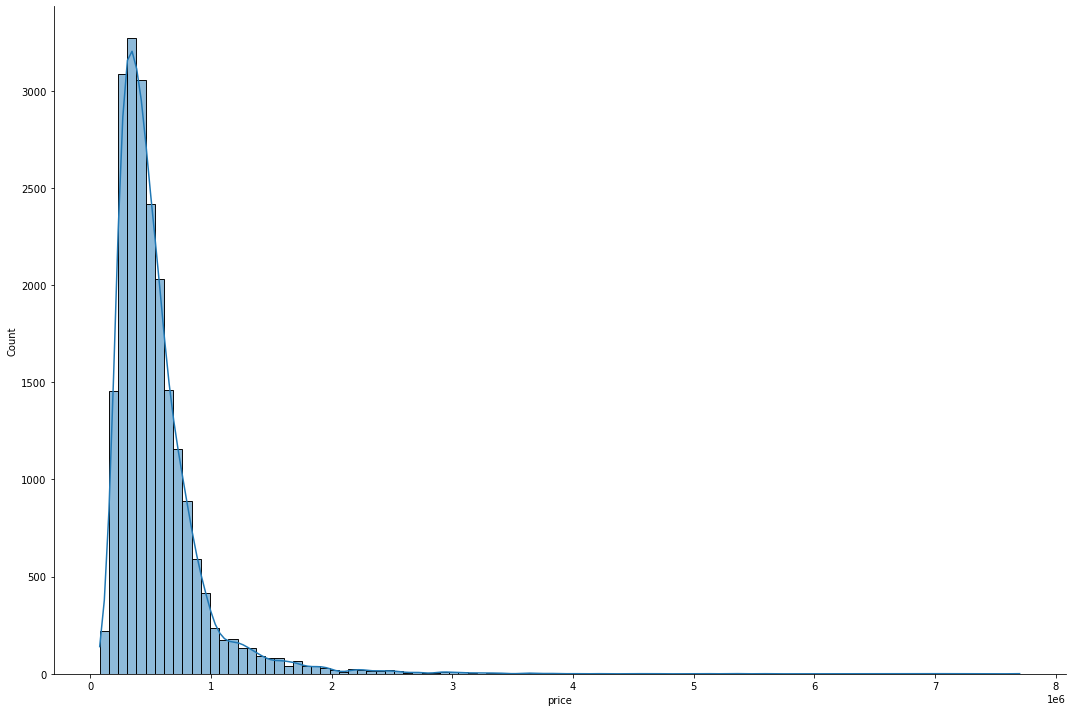

In [16]:
plt.figure(figsize=(14, 11))
sns.displot(x='price', data=df, bins=100, kde=True, height=10, aspect=1.5)

The distribution of prices is very heavily skewed. We will probably need to remove outliers.

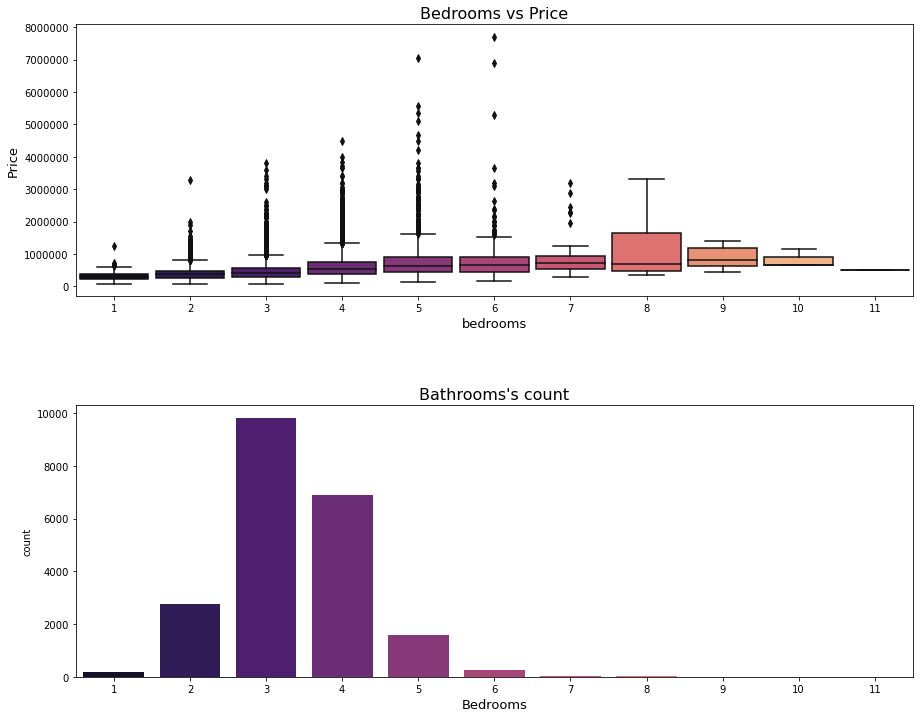

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15, 12))

sns.boxplot(ax=axes[0], x='bedrooms', y='price', data=df, width=0.9, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('bedrooms', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Bedrooms vs Price', fontsize=16)

sns.countplot(ax=axes[1], x='bedrooms', data=df, palette='magma')
axes[1].set_xlabel('Bedrooms', fontsize=13)
axes[1].set_title("Bathrooms's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

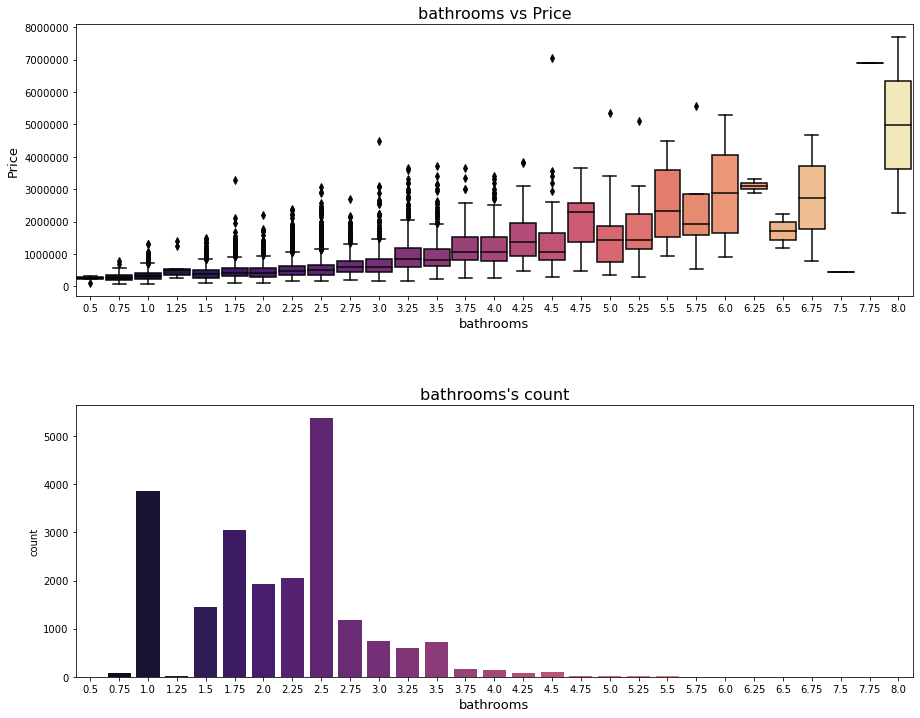

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15, 12))

sns.boxplot(ax=axes[0], x='bathrooms', y='price', data=df, width=0.9, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('bathrooms', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('bathrooms vs Price', fontsize=16)

sns.countplot(ax=axes[1], x='bathrooms', data=df, palette='magma')
axes[1].set_xlabel('bathrooms', fontsize=13)
axes[1].set_title("bathrooms's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

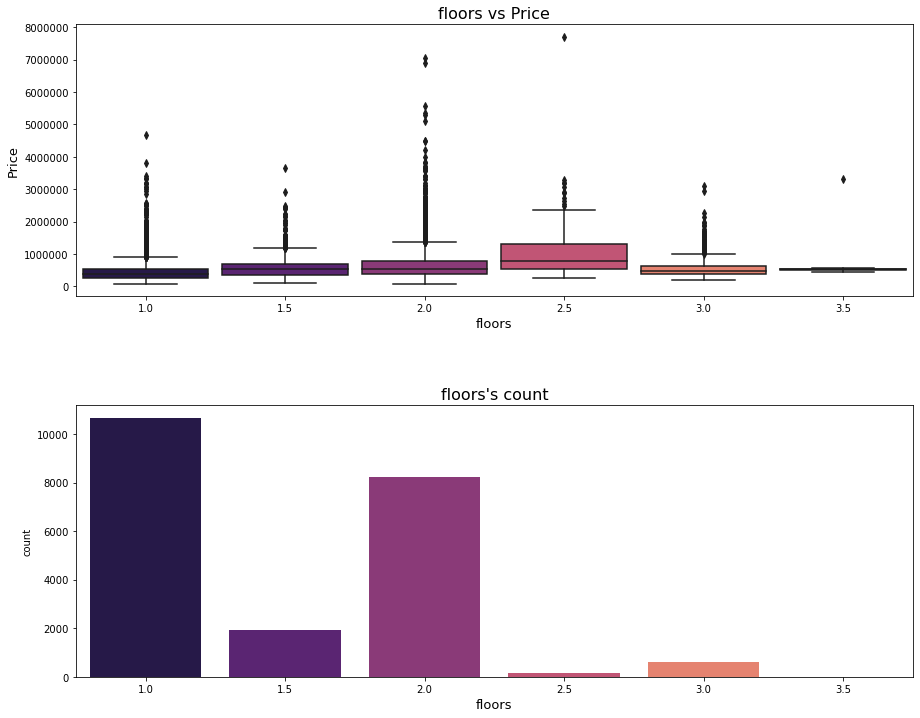

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15, 12))

sns.boxplot(ax=axes[0], x='floors', y='price', data=df, width=0.9, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('floors', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('floors vs Price', fontsize=16)

sns.countplot(ax=axes[1], x='floors', data=df, palette='magma')
axes[1].set_xlabel('floors', fontsize=13)
axes[1].set_title("floors's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

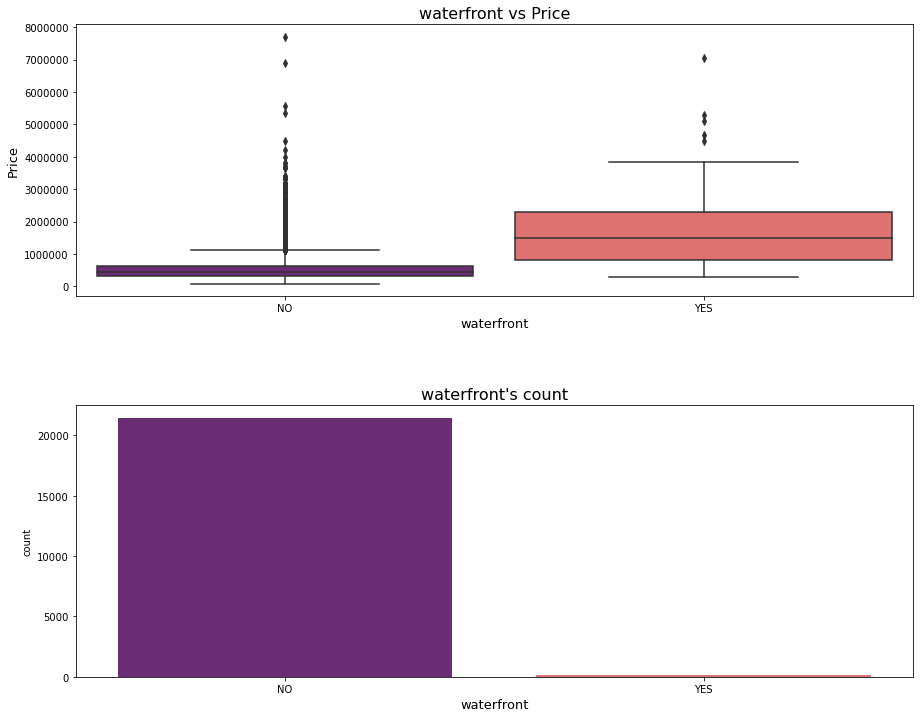

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15, 12))

sns.boxplot(ax=axes[0], x='waterfront', y='price', data=df, width=0.9, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('waterfront', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('waterfront vs Price', fontsize=16)

sns.countplot(ax=axes[1], x='waterfront', data=df, palette='magma')
axes[1].set_xlabel('waterfront', fontsize=13)
axes[1].set_title("waterfront's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

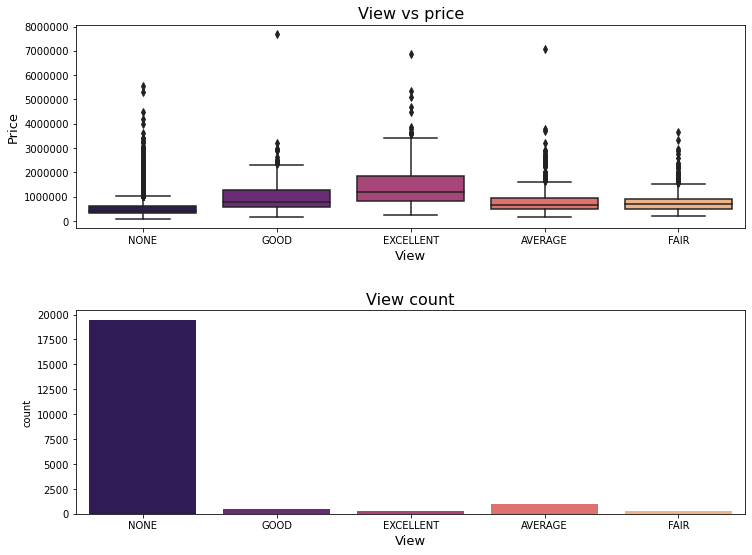

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))

sns.boxplot(ax=axes[0], x='view', y='price', data=df, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('View', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('View vs price', fontsize=16)

sns.countplot(ax=axes[1], x='view', data=df, palette='magma')
axes[1].set_xlabel('View', fontsize=13)
axes[1].set_title("View count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

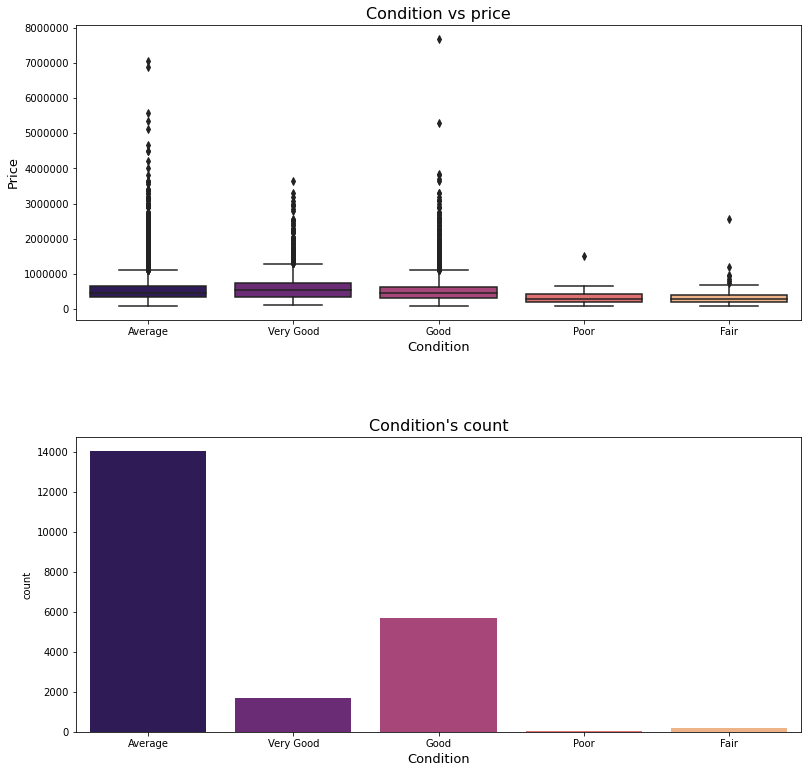

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 13))

sns.boxplot(ax=axes[0], x='condition', y='price', data=df, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Condition', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Condition vs price', fontsize=16)

sns.countplot(ax=axes[1], x='condition', data=df, palette='magma')
axes[1].set_xlabel('Condition', fontsize=13)
axes[1].set_title("Condition's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

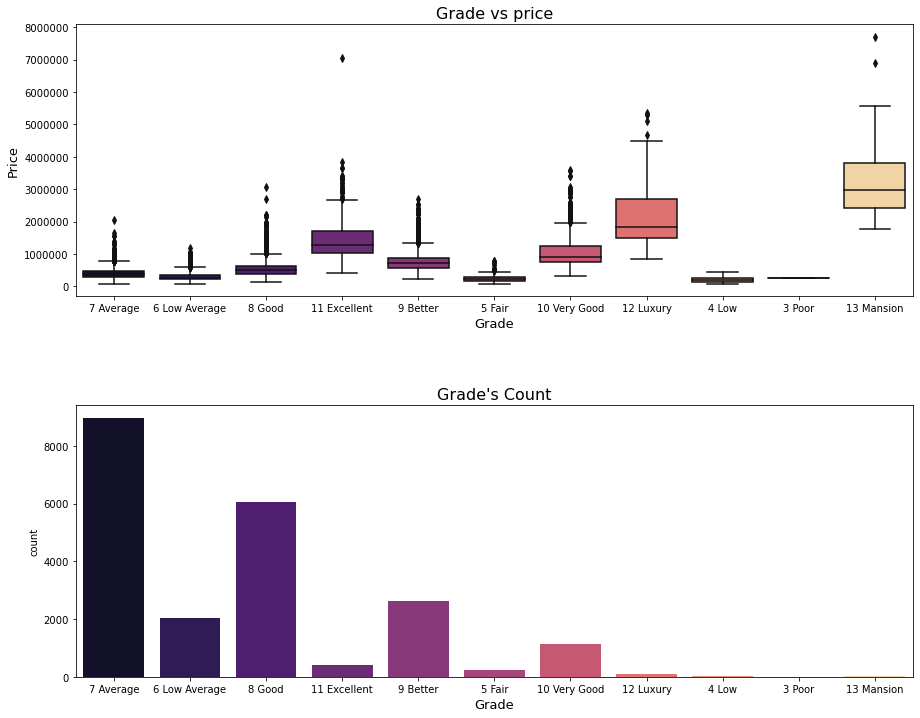

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.boxplot(ax=axes[0], x='grade', y='price', data=df, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Grade', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Grade vs price', fontsize=16)

sns.countplot(ax=axes[1], x='grade', data=df, palette='magma')
axes[1].set_xlabel('Grade', fontsize=13)
axes[1].set_title("Grade's Count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

Skewed is a good keyword for all of the features. We will wait a bit to investigate whether or not a transform will help at all.

Our next step, however, is to create dummy variable columns of the categorical variables. We will use the get_dummies method and then concat the dummy columns and our original dataframe into our new dataframe df1.

In [24]:
categorical = ['waterfront', 'view', 'condition', 'grade']

dummies = pd.get_dummies(df[categorical], drop_first=True)

df1 = df.drop(df[categorical], axis=1)

df1 = pd.concat([df1, dummies], axis=1)

df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.00,3,1.00,1180,5650,1.00,1180,98178,47.51,-122.26,...,0,0,0,0,0,0,0,1,0,0
1,538000.00,3,2.25,2570,7242,2.00,2170,98125,47.72,-122.32,...,0,0,0,0,0,0,0,1,0,0
2,180000.00,2,1.00,770,10000,1.00,770,98028,47.74,-122.23,...,0,0,0,0,0,0,1,0,0,0
3,604000.00,4,3.00,1960,5000,1.00,1050,98136,47.52,-122.39,...,0,0,0,0,0,0,0,1,0,0
4,510000.00,3,2.00,1680,8080,1.00,1680,98074,47.62,-122.05,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,1530,98103,47.70,-122.35,...,0,0,0,0,0,0,0,0,1,0
21593,400000.00,4,2.50,2310,5813,2.00,2310,98146,47.51,-122.36,...,0,0,0,0,0,0,0,0,1,0
21594,402101.00,2,0.75,1020,1350,2.00,1020,98144,47.59,-122.30,...,0,0,0,0,0,0,0,1,0,0
21595,400000.00,3,2.50,1600,2388,2.00,1600,98027,47.53,-122.07,...,0,0,0,0,0,0,0,0,1,0


# Modeling the data 

With preprocessing out of the way, we can finally move on to regression. Our response variable will be price, and to establish a baseline, we will use just the feature most highly correlated with price. Here we're taking the absolute value of the correlation only for sorting purposes. Even if a feature were to have say, a negative 0.46 correlation, the magnitude of the relationship is what's important. Sort by descending would put those at the bottom.

Looking below, it seems that that feature is sqft_living.

In [25]:
corr_matrix = df1.corr()
abs(corr_matrix['price']).sort_values(ascending=False)

price                 1.00
sqft_living           0.70
sqft_above            0.61
sqft_living15         0.59
bathrooms             0.53
grade_11 Excellent    0.36
view_NONE             0.36
grade_7 Average       0.32
bedrooms              0.32
lat                   0.31
view_EXCELLENT        0.30
grade_12 Luxury       0.29
waterfront_YES        0.26
floors                0.26
grade_9 Better        0.24
grade_13 Mansion      0.21
grade_6 Low Average   0.21
view_GOOD             0.18
recent_reno           0.12
view_FAIR             0.09
sqft_lot              0.09
grade_5 Fair          0.08
sqft_lot15            0.08
condition_Very Good   0.06
age                   0.05
zipcode               0.05
condition_Fair        0.05
grade_4 Low           0.03
condition_Good        0.03
long                  0.02
condition_Poor        0.02
grade_3 Poor          0.01
grade_8 Good          0.00
Name: price, dtype: float64

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
price,1.00,0.32,0.53,0.70,0.09,0.26,0.61,-0.05,0.31,0.02,...,0.36,0.29,0.21,-0.01,-0.03,-0.08,-0.21,-0.32,0.00,0.24
bedrooms,0.32,1.00,0.53,0.59,0.03,0.18,0.49,-0.16,-0.01,0.14,...,0.12,0.06,0.04,-0.02,-0.07,-0.12,-0.24,-0.11,0.08,0.16
bathrooms,0.53,0.53,1.00,0.76,0.09,0.50,0.69,-0.20,0.02,0.22,...,0.25,0.16,0.10,-0.01,-0.06,-0.14,-0.37,-0.31,0.19,0.26
sqft_living,0.70,0.59,0.76,1.00,0.17,0.35,0.88,-0.20,0.05,0.24,...,0.35,0.24,0.14,-0.01,-0.05,-0.13,-0.31,-0.36,0.07,0.32
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.00,0.18,-0.13,-0.09,0.23,...,0.08,0.06,0.01,-0.00,0.00,0.02,-0.02,-0.07,-0.02,0.05
floors,0.26,0.18,0.50,0.35,-0.00,1.00,0.52,-0.06,0.05,0.13,...,0.12,0.05,0.02,-0.01,-0.03,-0.08,-0.23,-0.31,0.20,0.24
sqft_above,0.61,0.49,0.69,0.88,0.18,0.52,1.00,-0.26,-0.00,0.34,...,0.34,0.22,0.13,-0.01,-0.05,-0.11,-0.28,-0.39,0.06,0.34
zipcode,-0.05,-0.16,-0.20,-0.20,-0.13,-0.06,-0.26,1.00,0.27,-0.56,...,-0.06,-0.04,0.00,-0.01,-0.01,0.01,0.15,0.07,-0.05,-0.09
lat,0.31,-0.01,0.02,0.05,-0.09,0.05,-0.00,0.27,1.00,-0.14,...,0.04,0.02,0.01,-0.02,-0.02,-0.05,-0.06,-0.04,0.03,0.04
long,0.02,0.14,0.22,0.24,0.23,0.13,0.34,-0.56,-0.14,1.00,...,0.06,0.03,-0.01,0.01,0.01,0.01,-0.11,-0.11,0.03,0.13


<AxesSubplot:>

<function matplotlib.pyplot.show(close=None, block=None)>

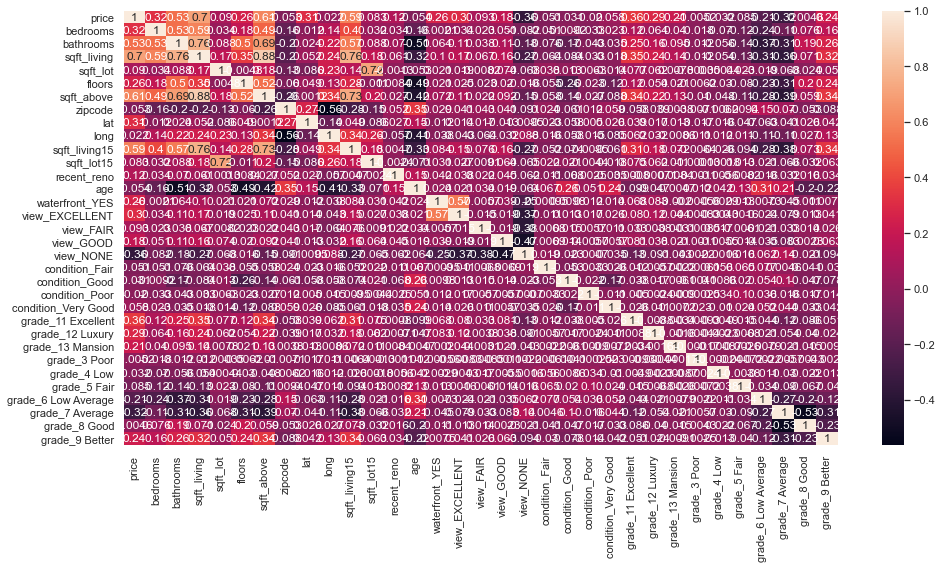

In [26]:
df1.corr()
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(df1.corr(), annot=True)
plt.show

In [27]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'recent_reno', 'age', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better'],
      dtype='object')

Here we establish our baseline by creating a simple linear regression model between our predictor, sqft_living, and our response variable, price. 

First we define X and y.
We then split the data into training and test datasets, with 80% assigned to train, and 20% to test.
The LinearRegression model is then fit to the training dataset.
After training, we are able to use our model 'baseline' to make predictions.
We create a dataframe containing our actual and predicted prices, as well as the residuals.

Here we've chosen to display our data as integers for readability.

We've also displayed our scores as integers for the same reason except for r2, which has instead been
rounded to three places.

# Baseline Model

In [28]:
# Define X and y variables
X = df1[['sqft_living']]
y = df1['price']
X1 = sm.add_constant(X)
baseline = sm.OLS(y, X1).fit()
baseline.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        06:47:55   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score

# Split the data, assigning 20% of it to the test group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Instantiate the model and fit on the training data
baseline = LinearRegression()
baseline.fit(X_train, y_train)

# Having fit the model, create a dataframe of model coefficients vs feature(s)
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': baseline.coef_})
coef_df

# Make predictions and store as dataframe with residual. Change datatype to int for readability
y_predict = baseline.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)
print('The intercept is:', int(baseline.intercept_))


# Scoring the model
print('The intercept is:', int(baseline.intercept_))
print('R-squared Score:', round(r2_score(y_test, y_predict), 3))
print('Mean Absolute Error:', int(metrics.mean_absolute_error(y_test, y_predict)))
print('Mean Squared Error:', int(metrics.mean_squared_error(y_test, y_predict)))
print('Root Mean Squared Error:', int(np.sqrt(metrics.mean_squared_error(y_test, y_predict))))

LinearRegression()

,Feature,Coefficient
0,sqft_living,281.65


,Actual,Predicted,Residual
3686,132500,194111,-61611
10247,415000,379997,35002
4037,494000,458859,35140
3437,355000,275788,79211
19291,606000,377181,228818
...,...,...,...
2522,175000,241991,-66991
11119,394950,532087,-137137
11973,437000,551802,-114802
17601,293000,515188,-222188


The intercept is: -45288
The intercept is: -45288
R-squared Score: 0.494
Mean Absolute Error: 171321
Mean Squared Error: 66347737547
Root Mean Squared Error: 257580


After each model run, we display a number of graphics that test whether we're adhering to the assumptions of 
linear regression.

The first is a residual vs fit scatterplot, which can show us whether or not the assumption of equal variances holds.
The second checks linearity of residuals.
The third is a standard qq plot to determine if the data is normally distributed.

## Baseline Model Predictions and Assumptions Tests

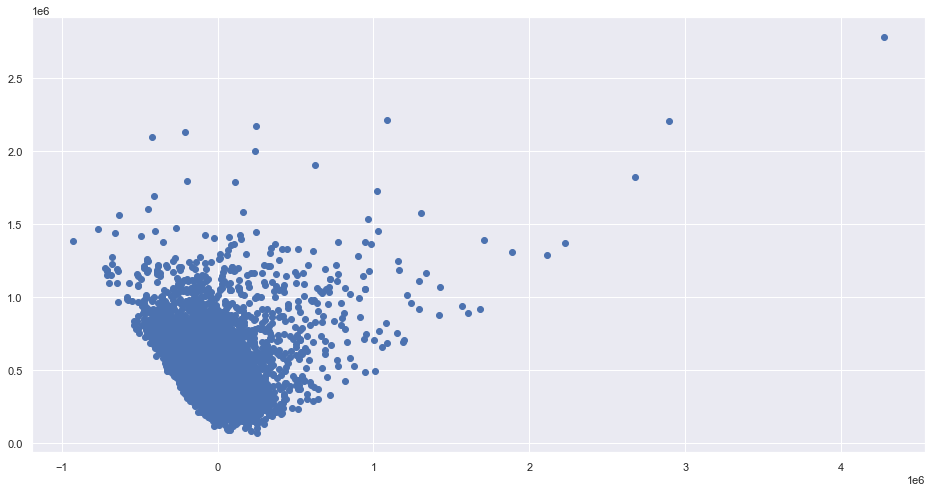

,Actual,Predicted,Residual,StdResidual
3686,132500.00,194111.07,-61611.07,-0.23
10247,415000.00,379997.96,35002.04,0.14
4037,494000.00,458859.06,35140.94,0.14
3437,355000.00,275788.64,79211.36,0.31
19291,606000.00,377181.49,228818.51,0.89
...,...,...,...,...
2522,175000.00,241991.03,-66991.03,-0.25
11119,394950.00,532087.23,-137137.23,-0.53
11973,437000.00,551802.51,-114802.51,-0.44
17601,293000.00,515188.43,-222188.43,-0.86


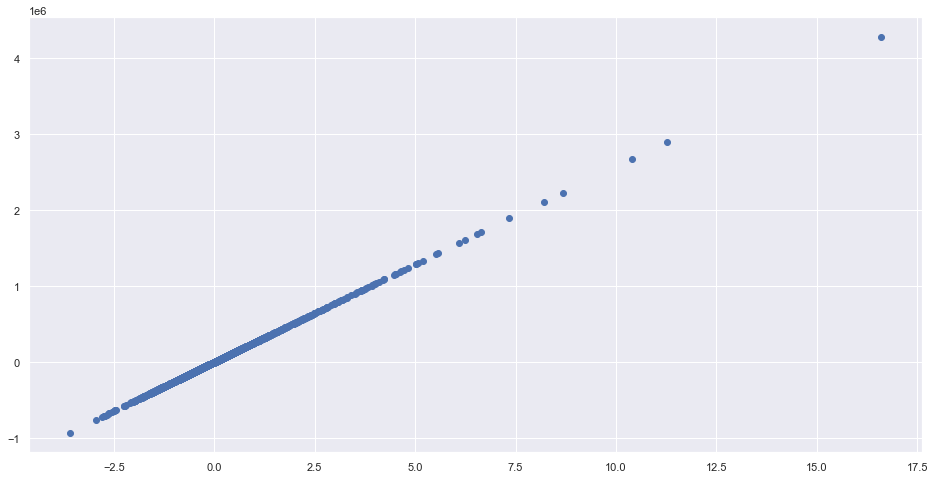

((array([-3.99684924, -3.78161652, -3.66388182, ...,  3.66388182,
          3.78161652,  3.99684924]),
  array([  78000.,   80000.,   81000., ..., 6890000., 7060000., 7700000.])),
 (309913.75382095797, 540291.9567512503, 0.8434565852738316))

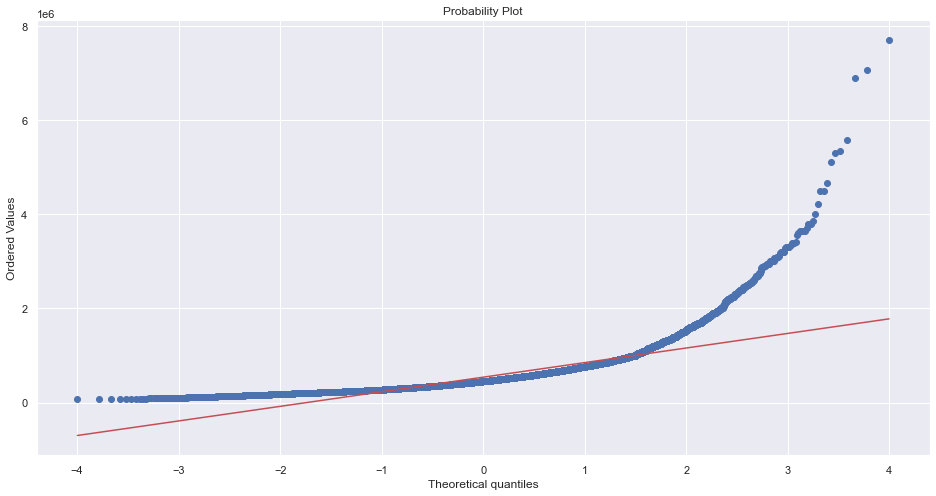

In [30]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.show()

import pylab 

stats.probplot(y, dist="norm", plot=pylab)
pylab.show()

## Baseline Model k-Folds Cross-Validation

In [31]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(baseline, X, y, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(baseline, X, y, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(baseline, X, y, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.4920580149675523

0.48925576375274726

0.49035828525045877

With only sqft_living, our model acheives an R-Squared value of about 50%...not too shabby. Next we will use the previous correlation value list to select the most promising features in terms of predictive value by dropping from df1 features with the weakest price correlation values.

# Correlation Model

This model will use features most correlated with price, and will drop those features least correlated, as well as those indicated by the multicollinearity heatmap as having correlation >= 0.70.

In [32]:
X = df1.drop(['price', 
              'floors',
              'sqft_above',
              'view_FAIR',              
              'sqft_lot',               
              'grade_5 Fair',           
              'sqft_lot15',             
              'condition_Very Good',    
              'age',              
              'zipcode',      
              'condition_Fair',         
              'grade_4 Low',            
              'condition_Good',         
              'long',
              'condition_Poor', 
              'grade_3 Poor', 
              'grade_8 Good'], axis=1)
y = df1['price']
# Define X and y variables
X1 = sm.add_constant(X)
model_1 = sm.OLS(y, X1).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     2890.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        06:47:56   Log-Likelihood:            -2.9501e+05
No. Observations:               21596   AIC:                         5.901e+05
Df Residuals:                   21579   BIC:                         5.902e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.277e+07   4.88e+05    -67.091      0.000   -3.37e+07   -3.18e+07
bedrooms            -2.111e+04   2031.270    -10.391      0.000   -2.51e+04   -1.71e+04
bathrooms            8328.5181   2963.438      2.810      0.005    2519.961    1.41e+04
sqft_living           183.1437      3.348     54.704      0.000     176.582     189.706
lat                  6.939e+05   1.03e+04     67.648      0.000    6.74e+05    7.14e+05
sqft_living15          37.0945      3.322     11.166      0.000      30.583      43.606
recent_reno           1.63e+05   9257.236     17.607      0.000    1.45e+05    1.81e+05
waterfront_YES       5.598e+05    2.1e+04     26.634      0.000    5.19e+05    6.01e+05
view_EXCELLENT       2.022e+05   1.54e+04     13.170      0.000    1.72e+05    2.32e+05
view_GOOD            6.513e+04   1.09e+04      5.975      0.000    4.38e+04    8.65e+04
view_NONE           -1.129e+05   6087.061    -18.549      0.000   -1.25e+05   -1.01e+05
grade_11 Excellent    3.72e+05   1.17e+04     31.758      0.000    3.49e+05    3.95e+05
grade_12 Luxury       7.82e+05   2.34e+04     33.463      0.000    7.36e+05    8.28e+05
grade_13 Mansion      1.94e+06   5.88e+04     32.963      0.000    1.82e+06    2.06e+06
grade_6 Low Average -3.615e+04   6049.575     -5.976      0.000    -4.8e+04   -2.43e+04
grade_7 Average     -4.361e+04   3709.064    -11.759      0.000   -5.09e+04   -3.63e+04
grade_9 Better       3.707e+04   4886.302      7.587      0.000    2.75e+04    4.66e+04
==============================================================================
Omnibus:                    13405.673   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           457239.024
Skew:                           2.449   Prob(JB):                         0.00
Kurtosis:                      25.003   Cond. No.                     1.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# split the data into test/train groups with 20% of the data allocated to testing. The process used for the baseline will be the same 
# for each iteration of regression

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': X1.columns, 'Coefficient': model_1.coef_})
coef_df

y_predict = model_1.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)

print('The intercept is:', model_1.intercept_)
print('R-squared Score:', r2_score(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

LinearRegression()

,Feature,Coefficient
0,const,0.00
1,bedrooms,-20455.89
2,bathrooms,7948.04
3,sqft_living,178.88
4,lat,690855.24
5,sqft_living15,41.72
6,recent_reno,160727.03
7,waterfront_YES,547392.28
8,view_EXCELLENT,195546.09
9,view_GOOD,65046.74


,Actual,Predicted,Residual
3686,132500,175251,-42751
10247,415000,456582,-41582
4037,494000,364475,129524
3437,355000,435174,-80174
19291,606000,436793,169206
...,...,...,...
2522,175000,103152,71847
11119,394950,479964,-85014
11973,437000,385534,51465
17601,293000,283997,9002


The intercept is: -32622840.843458503
R-squared Score: 0.67302486773568
Mean Absolute Error: 129988.20005240993
Mean Squared Error: 42837997006.45862
Root Mean Squared Error: 206973.42101453175


## Correlation Model Predictions and Assumption Tests

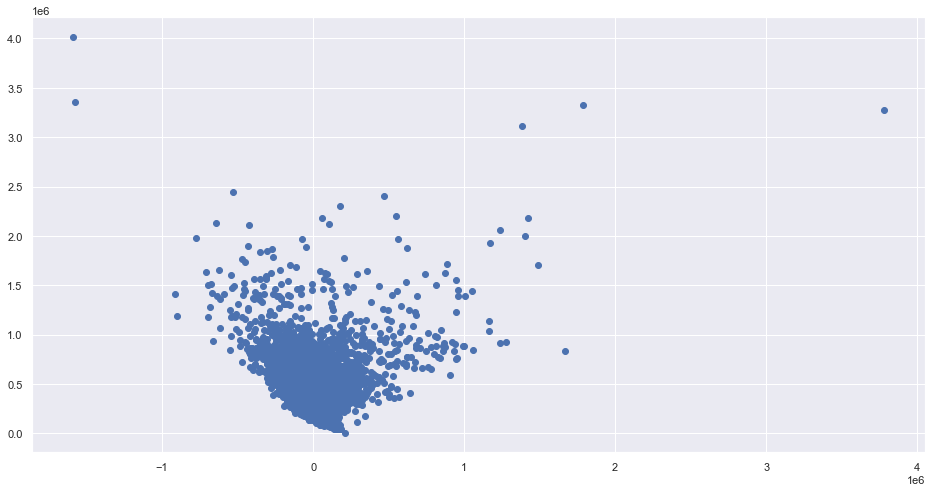

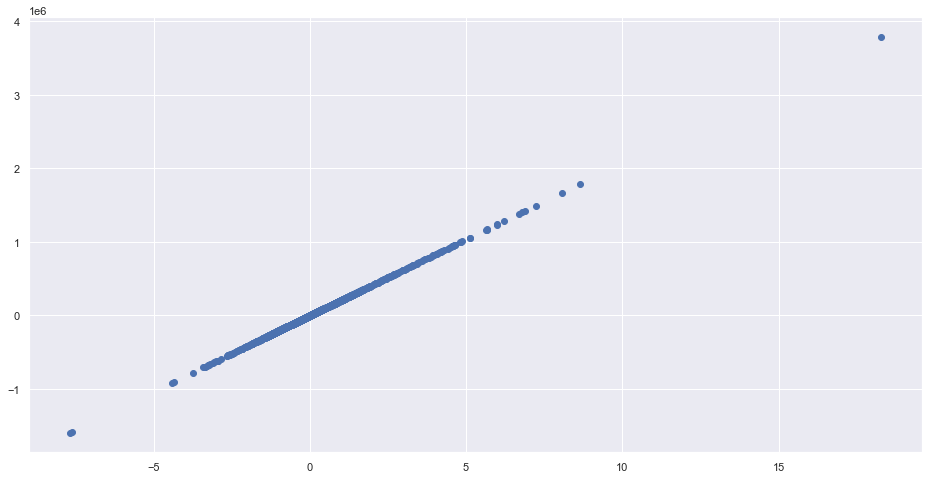

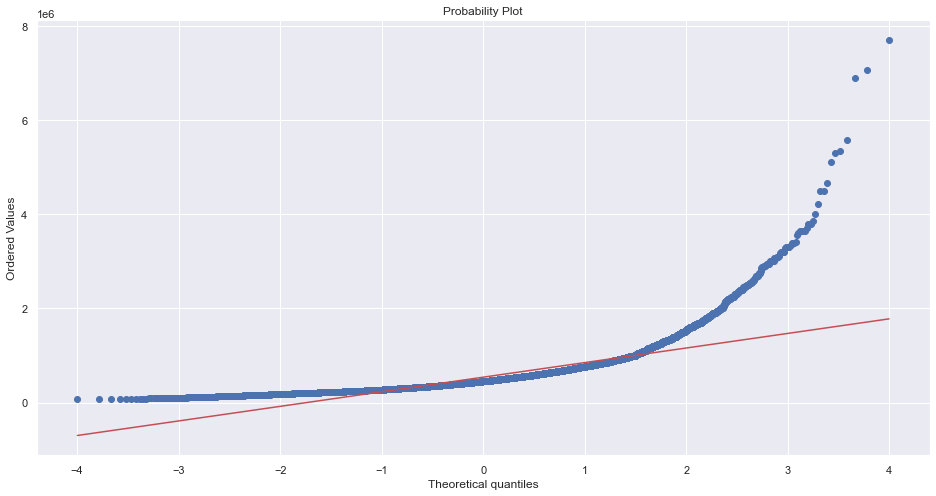

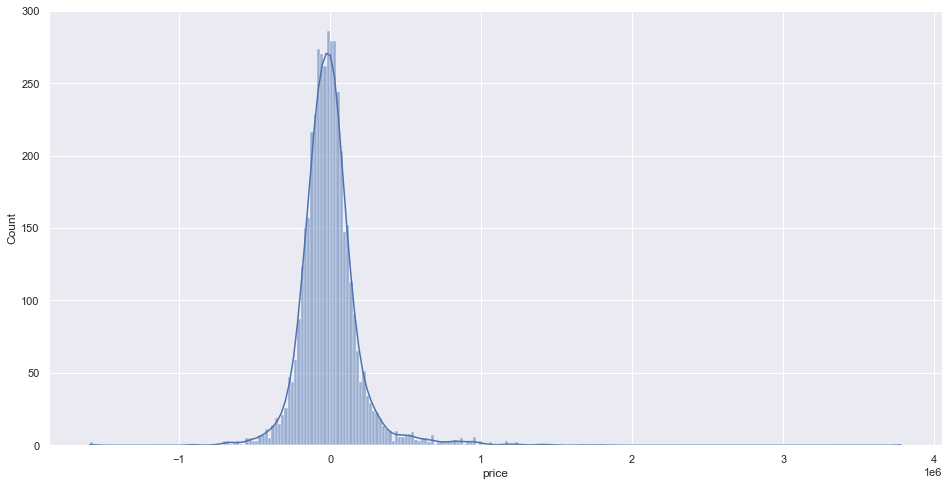

In [34]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.show()

import pylab 

stats.probplot(y, dist="norm", plot=pylab)
plt.show()

sns.histplot(residuals, kde=True);


## Correlation Model Cross-Validation

In [35]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(model_1, X, y, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_1, X, y, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_1, X, y, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.6763454397780456

0.677372904505859

0.6760271279227819

Our first iteration's r-squared has jumped to 0.672 with the addition of a number of features. At this point we could just continue to trial and error adding features, but fortunately we can make use of a shortcut that will calculate the optimum number of features to maximize r-squared using RFE. This works by determining the importance of each feature, with least important removed from the dataset.

# Sklearn Feature Selected Model

In [36]:
# Include all features in X, and let response remain target.
X = df1.drop('price', axis=1)
y = df1['price']


#no of features
nof_list=np.arange(1,34)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print('Optimum number of features: %d' %nof)
print('Score with %d features: %f' % (nof, high_score))

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

Optimum number of features: 27
Score with 27 features: 0.727990


According to this process, our score tops out at 0.73 with 27 features.
Luckily, we can just as easily use sklearn to select those features for us.

In [37]:
y = df1['price']
X = df1.drop('price', axis=1)


model = LinearRegression() 
selector = RFE(model, n_features_to_select=(27)) 
 
# convert y to 1d np array to prevent DataConversionWarning
selector = selector.fit(X, y.values.ravel()) 
    
# create list of selected columns
selected_columns = X.columns[selector.support_ ]
selected_columns

Index(['bedrooms', 'bathrooms', 'floors', 'zipcode', 'lat', 'long',
       'recent_reno', 'age', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better'],
      dtype='object')

Now we will put these columns and values into a new object so we won't have to write out a long list of dropped
features when we define our regression variables.

In [38]:
selected_columns = df1[['price',
                        'bedrooms', 
                        'bathrooms', 
                        'floors', 
                        'zipcode', 
                        'lat',
                        'long',
                        'zipcode',
                        'recent_reno', 
                        'age', 
                        'waterfront_YES', 
                        'view_EXCELLENT', 
                        'view_FAIR', 
                        'view_GOOD',
                        'view_NONE', 
                        'condition_Fair', 
                        'condition_Good', 
                        'condition_Poor', 
                        'condition_Very Good', 
                        'grade_11 Excellent', 
                        'grade_12 Luxury',
                        'grade_13 Mansion', 
                        'grade_3 Poor', 
                        'grade_4 Low', 
                        'grade_5 Fair', 
                        'grade_6 Low Average', 
                        'grade_7 Average', 
                        'grade_8 Good', 
                        'grade_9 Better']]

We will store this master list of features in a new dataframe for convenience. This dataframe contains only features recommended by the RFE routine.

In [39]:
df_op = pd.DataFrame(selected_columns)
df_op

,price,bedrooms,bathrooms,floors,zipcode,lat,long,zipcode,recent_reno,age,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.00,3,1.00,1.00,98178,47.51,-122.26,98178,0,67,...,0,0,0,0,0,0,0,1,0,0
1,538000.00,3,2.25,2.00,98125,47.72,-122.32,98125,1,71,...,0,0,0,0,0,0,0,1,0,0
2,180000.00,2,1.00,1.00,98028,47.74,-122.23,98028,0,89,...,0,0,0,0,0,0,1,0,0,0
3,604000.00,4,3.00,1.00,98136,47.52,-122.39,98136,0,57,...,0,0,0,0,0,0,0,1,0,0
4,510000.00,3,2.00,1.00,98074,47.62,-122.05,98074,0,35,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,3.00,98103,47.70,-122.35,98103,0,13,...,0,0,0,0,0,0,0,0,1,0
21593,400000.00,4,2.50,2.00,98146,47.51,-122.36,98146,0,8,...,0,0,0,0,0,0,0,0,1,0
21594,402101.00,2,0.75,2.00,98144,47.59,-122.30,98144,0,13,...,0,0,0,0,0,0,0,1,0,0
21595,400000.00,3,2.50,2.00,98027,47.53,-122.07,98027,0,18,...,0,0,0,0,0,0,0,0,1,0


## Checking Multicollinear Features

Next we will create a correlation matrix to look for multicollinear features

,price,bedrooms,bathrooms,floors,zipcode,lat,long,zipcode,recent_reno,age,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
price,1.00,0.32,0.53,0.26,-0.05,0.31,0.02,-0.05,0.12,-0.05,...,0.36,0.29,0.21,-0.01,-0.03,-0.08,-0.21,-0.32,0.00,0.24
bedrooms,0.32,1.00,0.53,0.18,-0.16,-0.01,0.14,-0.16,0.03,-0.16,...,0.12,0.06,0.04,-0.02,-0.07,-0.12,-0.24,-0.11,0.08,0.16
bathrooms,0.53,0.53,1.00,0.50,-0.20,0.02,0.22,-0.20,0.07,-0.51,...,0.25,0.16,0.10,-0.01,-0.06,-0.14,-0.37,-0.31,0.19,0.26
floors,0.26,0.18,0.50,1.00,-0.06,0.05,0.13,-0.06,0.01,-0.49,...,0.12,0.05,0.02,-0.01,-0.03,-0.08,-0.23,-0.31,0.20,0.24
zipcode,-0.05,-0.16,-0.20,-0.06,1.00,0.27,-0.56,1.00,0.05,0.35,...,-0.06,-0.04,0.00,-0.01,-0.01,0.01,0.15,0.07,-0.05,-0.09
lat,0.31,-0.01,0.02,0.05,0.27,1.00,-0.14,0.27,0.03,0.15,...,0.04,0.02,0.01,-0.02,-0.02,-0.05,-0.06,-0.04,0.03,0.04
long,0.02,0.14,0.22,0.13,-0.56,-0.14,1.00,-0.56,-0.06,-0.41,...,0.06,0.03,-0.01,0.01,0.01,0.01,-0.11,-0.11,0.03,0.13
zipcode,-0.05,-0.16,-0.20,-0.06,1.00,0.27,-0.56,1.00,0.05,0.35,...,-0.06,-0.04,0.00,-0.01,-0.01,0.01,0.15,0.07,-0.05,-0.09
recent_reno,0.12,0.03,0.07,0.01,0.05,0.03,-0.06,0.05,1.00,0.15,...,0.00,-0.00,0.01,-0.00,-0.01,-0.01,-0.02,-0.03,0.02,0.03
age,-0.05,-0.16,-0.51,-0.49,0.35,0.15,-0.41,0.35,0.15,1.00,...,-0.10,-0.05,-0.00,0.01,0.04,0.13,0.31,0.21,-0.20,-0.22


<AxesSubplot:>

<function matplotlib.pyplot.show(close=None, block=None)>

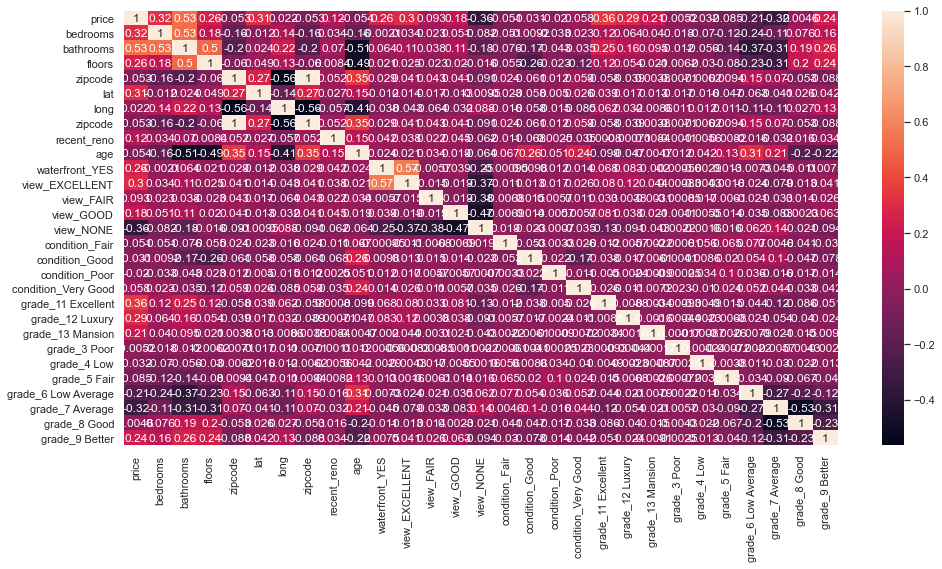

In [40]:
df_op.corr()
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(df_op.corr(), annot=True)
plt.show

Doesn't look like we have much of a collinearity problem here.

Our next iteration will train and test on the RFE selected dataframe using all 27 features

# All-in Model

The all-in model will use all 27 features recommended by RFE.

In [41]:
y = df_op['price']
X = df_op.drop('price', axis=1)
# Define X and y variables

X1 = sm.add_constant(X)
model_2 = sm.OLS(y, X1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1897.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        06:48:08   Log-Likelihood:            -2.9424e+05
No. Observations:               21596   AIC:                         5.885e+05
Df Residuals:                   21568   BIC:                         5.888e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.871e+07   2.77e+06      6.751      0.000    1.33e+07    2.41e+07
bedrooms             1.449e+04   1834.163      7.902      0.000    1.09e+04    1.81e+04
bathrooms            1.034e+05   2924.886     35.358      0.000    9.77e+04    1.09e+05
floors               1.908e+04   3241.120      5.886      0.000    1.27e+04    2.54e+04
zipcode              -314.0351     16.422    -19.123      0.000    -346.223    -281.847
lat                  6.164e+05   1.06e+04     58.115      0.000    5.96e+05    6.37e+05
long                -1.159e+05   1.23e+04     -9.393      0.000    -1.4e+05   -9.17e+04
zipcode              -314.0351     16.422    -19.123      0.000    -346.223    -281.847
recent_reno          9.951e+04   9285.576     10.716      0.000    8.13e+04    1.18e+05
age                  2616.6420     71.551     36.570      0.000    2476.396    2756.888
waterfront_YES       5.725e+05   2.03e+04     28.218      0.000    5.33e+05    6.12e+05
view_EXCELLENT       2.084e+05   1.52e+04     13.737      0.000    1.79e+05    2.38e+05
view_FAIR            5.855e+04   1.28e+04      4.576      0.000    3.35e+04    8.36e+04
view_GOOD             7.73e+04    1.1e+04      7.015      0.000    5.57e+04    9.89e+04
view_NONE           -9.707e+04   6786.450    -14.303      0.000    -1.1e+05   -8.38e+04
condition_Fair      -7775.8754   1.56e+04     -0.498      0.619   -3.84e+04    2.28e+04
condition_Good       3.363e+04   3467.560      9.700      0.000    2.68e+04    4.04e+04
condition_Poor      -5.111e+04   3.75e+04     -1.362      0.173   -1.25e+05    2.24e+04
condition_Very Good  7.245e+04   5519.169     13.126      0.000    6.16e+04    8.33e+04
grade_11 Excellent   3.314e+05   1.17e+04     28.234      0.000    3.08e+05    3.54e+05
grade_12 Luxury      8.978e+05   2.23e+04     40.274      0.000    8.54e+05    9.41e+05
grade_13 Mansion     2.285e+06   5.62e+04     40.660      0.000    2.17e+06    2.39e+06
grade_3 Poor         -4.75e+05      2e+05     -2.370      0.018   -8.68e+05   -8.21e+04
grade_4 Low         -6.281e+05   3.95e+04    -15.884      0.000   -7.06e+05   -5.51e+05
grade_5 Fair        -6.397e+05   1.53e+04    -41.932      0.000    -6.7e+05    -6.1e+05
grade_6 Low Average -5.923e+05   8904.287    -66.516      0.000    -6.1e+05   -5.75e+05
grade_7 Average     -5.273e+05   7131.846    -73.937      0.000   -5.41e+05   -5.13e+05
grade_8 Good        -4.246e+05   6743.727    -62.964      0.000   -4.38e+05   -4.11e+05
grade_9 Better       -2.31e+05   7185.361    -32.153      0.000   -2.45e+05   -2.17e+05
==============================================================================
Omnibus:                    15760.891   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1099391.907
Skew:                         

Let's remove the two insignificant features (condition_Poor and condition_Fair with p-values 0f 0.173 and 0.619 respectively).

In [42]:
y = df_op['price']
X = df_op.drop(['price','condition_Poor','condition_Fair'], axis=1)
# Define X and y variables

X1 = sm.add_constant(X)
model_2 = sm.OLS(y, X1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2049.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        06:48:08   Log-Likelihood:            -2.9424e+05
No. Observations:               21596   AIC:                         5.885e+05
Df Residuals:                   21570   BIC:                         5.887e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.865e+07   2.77e+06      6.728      0.000    1.32e+07    2.41e+07
bedrooms             1.451e+04   1834.126      7.911      0.000    1.09e+04    1.81e+04
bathrooms            1.034e+05   2924.884     35.359      0.000    9.77e+04    1.09e+05
floors                1.91e+04   3240.456      5.895      0.000    1.27e+04    2.55e+04
zipcode              -313.6627     16.420    -19.102      0.000    -345.847    -281.478
lat                  6.164e+05   1.06e+04     58.137      0.000    5.96e+05    6.37e+05
long                -1.158e+05   1.23e+04     -9.387      0.000    -1.4e+05   -9.16e+04
zipcode              -313.6627     16.420    -19.102      0.000    -345.847    -281.478
recent_reno          9.973e+04   9281.991     10.745      0.000    8.15e+04    1.18e+05
age                  2611.5640     71.416     36.569      0.000    2471.584    2751.544
waterfront_YES       5.724e+05   2.03e+04     28.214      0.000    5.33e+05    6.12e+05
view_EXCELLENT       2.081e+05   1.52e+04     13.719      0.000    1.78e+05    2.38e+05
view_FAIR            5.841e+04   1.28e+04      4.565      0.000    3.33e+04    8.35e+04
view_GOOD            7.725e+04    1.1e+04      7.010      0.000    5.57e+04    9.89e+04
view_NONE           -9.714e+04   6786.192    -14.314      0.000    -1.1e+05   -8.38e+04
condition_Good       3.399e+04   3449.570      9.854      0.000    2.72e+04    4.08e+04
condition_Very Good  7.287e+04   5504.624     13.237      0.000    6.21e+04    8.37e+04
grade_11 Excellent   3.314e+05   1.17e+04     28.235      0.000    3.08e+05    3.54e+05
grade_12 Luxury      8.978e+05   2.23e+04     40.276      0.000    8.54e+05    9.42e+05
grade_13 Mansion     2.285e+06   5.62e+04     40.662      0.000    2.17e+06     2.4e+06
grade_3 Poor        -4.749e+05      2e+05     -2.369      0.018   -8.68e+05    -8.2e+04
grade_4 Low         -6.308e+05   3.95e+04    -15.984      0.000   -7.08e+05   -5.53e+05
grade_5 Fair        -6.419e+05   1.52e+04    -42.286      0.000   -6.72e+05   -6.12e+05
grade_6 Low Average -5.926e+05   8899.309    -66.591      0.000    -6.1e+05   -5.75e+05
grade_7 Average     -5.273e+05   7131.834    -73.941      0.000   -5.41e+05   -5.13e+05
grade_8 Good        -4.246e+05   6743.682    -62.966      0.000   -4.38e+05   -4.11e+05
grade_9 Better       -2.31e+05   7185.344    -32.153      0.000   -2.45e+05   -2.17e+05
==============================================================================
Omnibus:                    15755.816   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1098800.042
Skew:                           2.878   Prob(JB):                         0.00
Kurtosis:                      37.467   Cond. No.                     1.00e+16
================================================

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_2.coef_})
coef_df

y_predict = model_2.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)


print('The intercept is:', model_2.intercept_)
print('R-squared Score:', r2_score(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

LinearRegression()

,Feature,Coefficient
0,bedrooms,14380.95
1,bathrooms,103763.37
2,floors,18566.49
3,zipcode,-308.17
4,lat,612873.06
5,long,-113987.28
6,zipcode,-308.17
7,recent_reno,90602.34
8,age,2619.62
9,waterfront_YES,556452.20


,Actual,Predicted,Residual
3686,132500,179166,-46666
10247,415000,388375,26624
4037,494000,296874,197125
3437,355000,433447,-78447
19291,606000,395369,210630
...,...,...,...
2522,175000,169060,5939
11119,394950,363426,31523
11973,437000,533538,-96538
17601,293000,274292,18707


The intercept is: 17961658.25042007
R-squared Score: 0.6798483063699365
Mean Absolute Error: 125430.19213280358
Mean Squared Error: 41944037757.13031
Root Mean Squared Error: 204802.43591600738


## All-in Model Predictions and Assumptions Tests

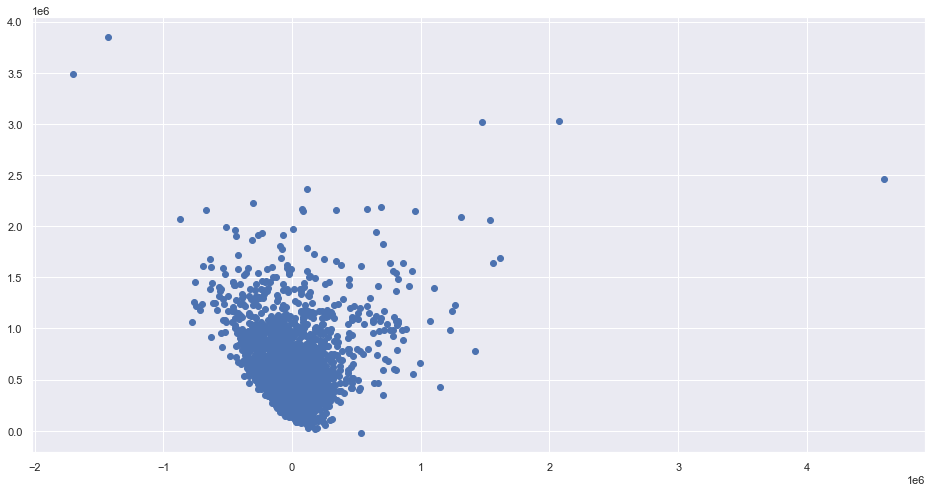

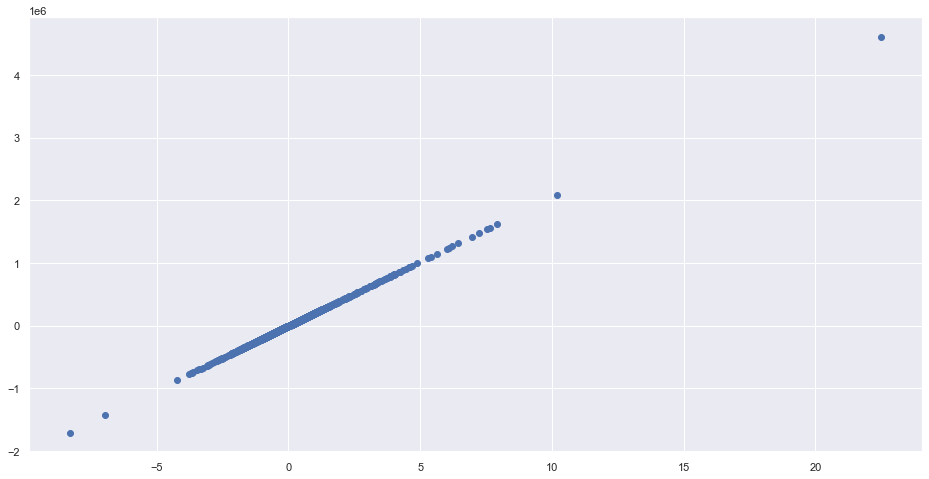

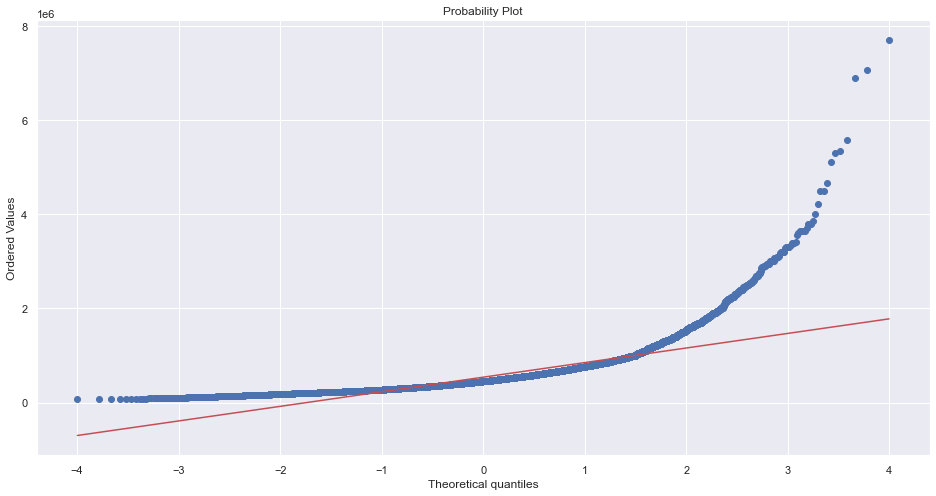

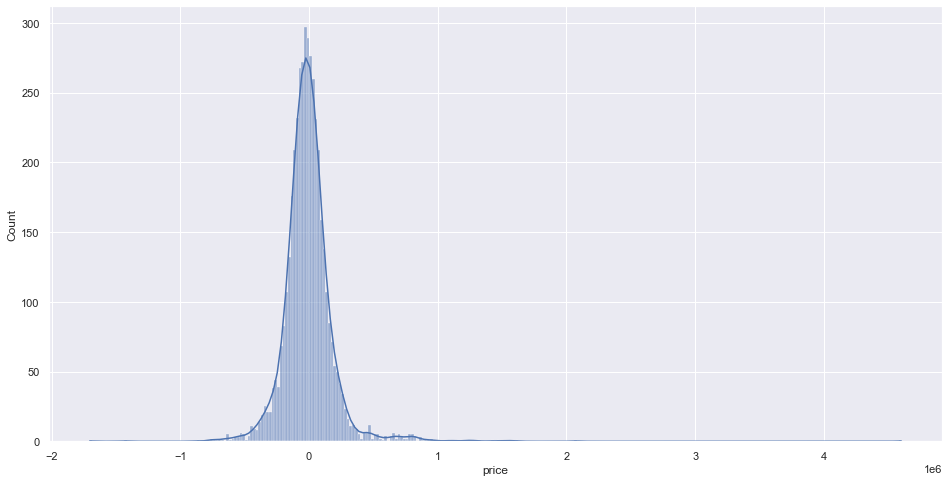

In [44]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.show()

import pylab 

stats.probplot(y, dist="norm", plot=pylab)
plt.show()

sns.histplot(residuals, kde=True);


## All-in Model Cross-Validation

In [45]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(model_2, X, y, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_2, X, y, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_2, X, y, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.6985628145053566

0.6950541823488725

0.6950950150824886

Only a slight boost to r2. Hmm. Notably absent from the RFE selected columns are those that had some of the highest correlation to price. I want to go back to our original dataframe and drop only those features that suggested collinearity problems.
So we will ignore df_op for now and return to using df1.

# All-in Modified Model

In [46]:
y = df1['price']
X = df1.drop(['price',
              'sqft_lot15',             
              'long',
              'sqft_living15',
              'sqft_above'], axis=1)

X1 = sm.add_constant(X)
model_3 = sm.OLS(y, X1).fit()
model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     2059.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        06:48:10   Log-Likelihood:            -2.9333e+05
No. Observations:               21596   AIC:                         5.867e+05
Df Residuals:                   21567   BIC:                         5.869e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.083e+07   2.68e+06      4.048      0.000    5.59e+06    1.61e+07
bedrooms            -2.159e+04   1928.691    -11.192      0.000   -2.54e+04   -1.78e+04
bathrooms            4.463e+04   3096.054     14.415      0.000    3.86e+04    5.07e+04
sqft_living           136.7651      3.059     44.707      0.000     130.769     142.761
sqft_lot               -0.1458      0.033     -4.470      0.000      -0.210      -0.082
floors               2.802e+04   3111.565      9.006      0.000    2.19e+04    3.41e+04
zipcode              -402.4478     27.945    -14.401      0.000    -457.222    -347.674
lat                  6.106e+05   1.02e+04     59.987      0.000    5.91e+05    6.31e+05
recent_reno          1.008e+05   8900.746     11.329      0.000    8.34e+04    1.18e+05
age                  2442.8622     67.254     36.323      0.000    2311.039    2574.685
waterfront_YES       5.532e+05   1.95e+04     28.441      0.000    5.15e+05    5.91e+05
view_EXCELLENT       1.948e+05   1.45e+04     13.394      0.000    1.66e+05    2.23e+05
view_FAIR            5.669e+04   1.23e+04      4.624      0.000    3.27e+04    8.07e+04
view_GOOD            7.012e+04   1.06e+04      6.635      0.000    4.94e+04    9.08e+04
view_NONE           -7.828e+04   6521.325    -12.004      0.000   -9.11e+04   -6.55e+04
condition_Fair      -5887.7018    1.5e+04     -0.393      0.694   -3.53e+04    2.35e+04
condition_Good       3.201e+04   3323.158      9.634      0.000    2.55e+04    3.85e+04
condition_Poor      -5.358e+04    3.6e+04     -1.490      0.136   -1.24e+05    1.69e+04
condition_Very Good  7.123e+04   5290.689     13.463      0.000    6.09e+04    8.16e+04
grade_11 Excellent   2.555e+05   1.14e+04     22.450      0.000    2.33e+05    2.78e+05
grade_12 Luxury      7.181e+05   2.18e+04     33.008      0.000    6.75e+05    7.61e+05
grade_13 Mansion     1.918e+06   5.45e+04     35.189      0.000    1.81e+06    2.02e+06
grade_3 Poor        -3.013e+05   1.92e+05     -1.568      0.117   -6.78e+05    7.54e+04
grade_4 Low         -4.362e+05   3.82e+04    -11.430      0.000   -5.11e+05   -3.61e+05
grade_5 Fair         -4.47e+05   1.53e+04    -29.270      0.000   -4.77e+05   -4.17e+05
grade_6 Low Average -4.104e+05   9460.010    -43.380      0.000   -4.29e+05   -3.92e+05
grade_7 Average     -3.627e+05   7736.483    -46.886      0.000   -3.78e+05   -3.48e+05
grade_8 Good        -2.946e+05   7055.158    -41.755      0.000   -3.08e+05   -2.81e+05
grade_9 Better      -1.688e+05   7024.116    -24.032      0.000   -1.83e+05   -1.55e+05
==============================================================================
Omnibus:                    14555.248   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           766879.204
Skew:                         

Next we will drop the features with p-values exceeding our alpha level of 0.05. When p(t)>alpha, the associated features do not have a statistically significant effect on our response variable, and in some cases can add multicollinearity to the model.
Those features and their p-values are: 

condition_Fair: 0.694
condition_Poor: 0.136
grade_3 Poor: 0.117

In [47]:
y = df1['price']
X = df1.drop(['price',
              'sqft_lot15',             
              'long',
              'sqft_living15',
              'sqft_above',
              'condition_Fair',
             'condition_Poor',
             'grade_3 Poor'],axis=1)

X1 = sm.add_constant(X)
model_3 = sm.OLS(y, X1).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     2305.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        06:48:10   Log-Likelihood:            -2.9333e+05
No. Observations:               21596   AIC:                         5.867e+05
Df Residuals:                   21570   BIC:                         5.869e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.072e+07   2.68e+06      4.007      0.000    5.48e+06     1.6e+07
bedrooms            -2.155e+04   1928.687    -11.171      0.000   -2.53e+04   -1.78e+04
bathrooms            4.464e+04   3096.176     14.419      0.000    3.86e+04    5.07e+04
sqft_living           136.8700      3.058     44.752      0.000     130.875     142.865
sqft_lot               -0.1466      0.033     -4.497      0.000      -0.210      -0.083
floors               2.804e+04   3111.142      9.014      0.000    2.19e+04    3.41e+04
zipcode              -401.4998     27.942    -14.369      0.000    -456.269    -346.730
lat                   6.11e+05   1.02e+04     60.052      0.000    5.91e+05    6.31e+05
recent_reno          1.011e+05   8897.700     11.359      0.000    8.36e+04    1.19e+05
age                  2436.1581     67.115     36.298      0.000    2304.608    2567.709
waterfront_YES       5.531e+05   1.95e+04     28.436      0.000    5.15e+05    5.91e+05
view_EXCELLENT       1.945e+05   1.45e+04     13.374      0.000    1.66e+05    2.23e+05
view_FAIR            5.651e+04   1.23e+04      4.609      0.000    3.25e+04    8.05e+04
view_GOOD            7.009e+04   1.06e+04      6.632      0.000    4.94e+04    9.08e+04
view_NONE            -7.84e+04   6521.235    -12.022      0.000   -9.12e+04   -6.56e+04
condition_Good       3.236e+04   3305.970      9.789      0.000    2.59e+04    3.88e+04
condition_Very Good  7.145e+04   5275.989     13.542      0.000    6.11e+04    8.18e+04
grade_11 Excellent   2.557e+05   1.14e+04     22.464      0.000    2.33e+05    2.78e+05
grade_12 Luxury      7.182e+05   2.18e+04     33.011      0.000    6.76e+05    7.61e+05
grade_13 Mansion     1.918e+06   5.45e+04     35.185      0.000    1.81e+06    2.02e+06
grade_4 Low          -4.38e+05   3.81e+04    -11.500      0.000   -5.13e+05   -3.63e+05
grade_5 Fair        -4.484e+05   1.52e+04    -29.513      0.000   -4.78e+05   -4.19e+05
grade_6 Low Average   -4.1e+05   9445.841    -43.408      0.000   -4.29e+05   -3.92e+05
grade_7 Average     -3.622e+05   7728.316    -46.868      0.000   -3.77e+05   -3.47e+05
grade_8 Good        -2.942e+05   7049.273    -41.729      0.000   -3.08e+05    -2.8e+05
grade_9 Better      -1.685e+05   7020.781    -23.995      0.000   -1.82e+05   -1.55e+05
==============================================================================
Omnibus:                    14545.602   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           765466.993
Skew:                           2.621   Prob(JB):                         0.00
Kurtosis:                      31.691   Cond. No.                     2.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

There is no difference in r-squared, but all features are significant.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model_3 = LinearRegression()
model_3.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': X1.columns, 'Coefficient': model_3.coef_})
coef_df

y_predict = model_3.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
#df_predict['Predicted'] = df_predict['Predicted'].astype(int)
df_predict.astype(int)

print('The intercept is:', model_3.intercept_)
print('R-squared Score:', r2_score(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

LinearRegression()

,Feature,Coefficient
0,const,0.00
1,bedrooms,-20427.44
2,bathrooms,45285.54
3,sqft_living,133.17
4,sqft_lot,-0.17
5,floors,27677.97
6,zipcode,-395.59
7,lat,606567.11
8,recent_reno,95669.65
9,age,2457.50


,Actual,Predicted,Residual
3686,132500,152736,-20236
10247,415000,428328,-13328
4037,494000,304268,189731
3437,355000,397050,-42050
19291,606000,415130,190869
...,...,...,...
2522,175000,168749,6250
11119,394950,376959,17990
11973,437000,460219,-23219
17601,293000,271817,21182


The intercept is: 10359548.123390181
R-squared Score: 0.7114890344405256
Mean Absolute Error: 119316.39167535407
Mean Squared Error: 37798690663.04498
Root Mean Squared Error: 194418.85367176967


## Model 3 Predictions and Assumptions Tests

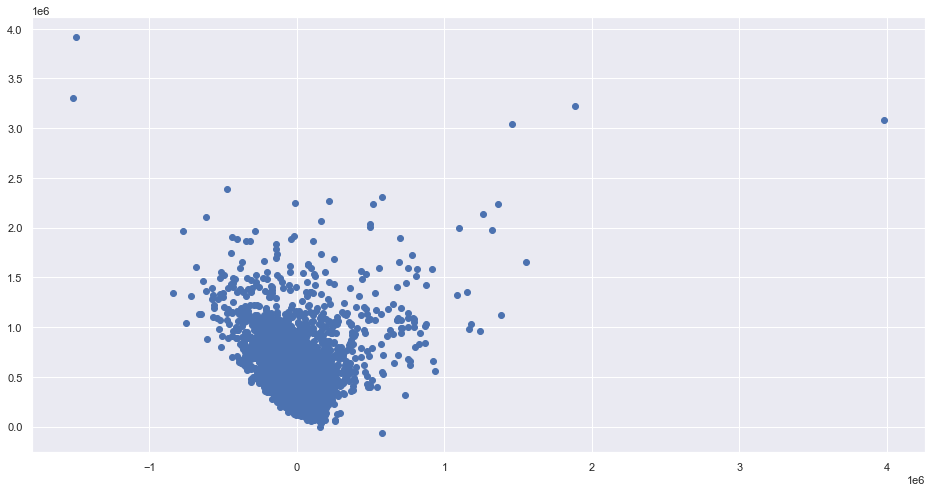

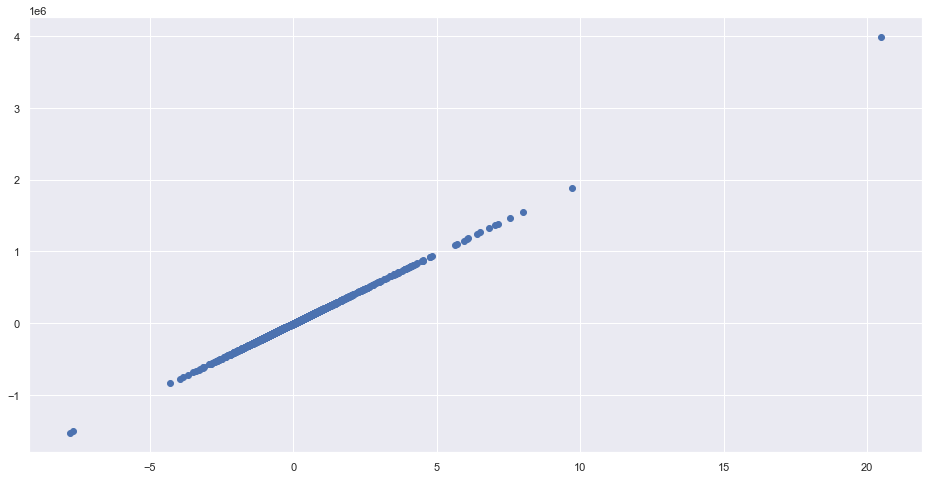

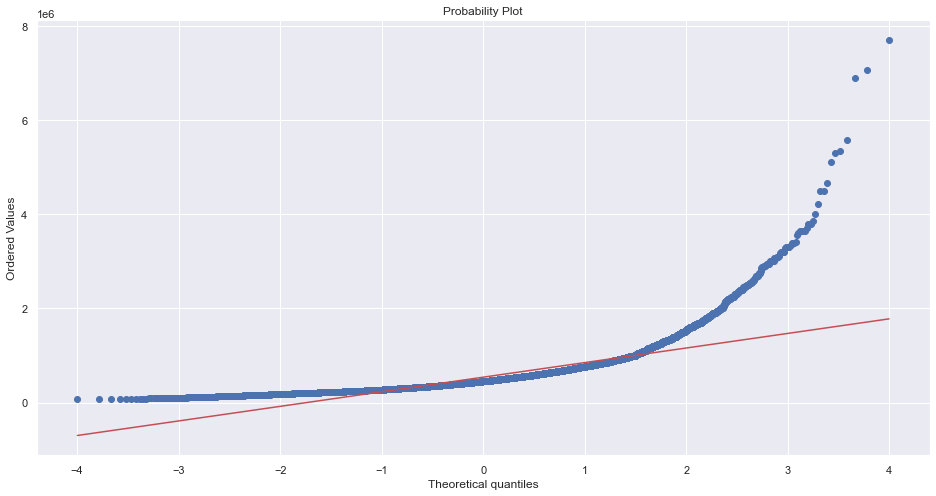

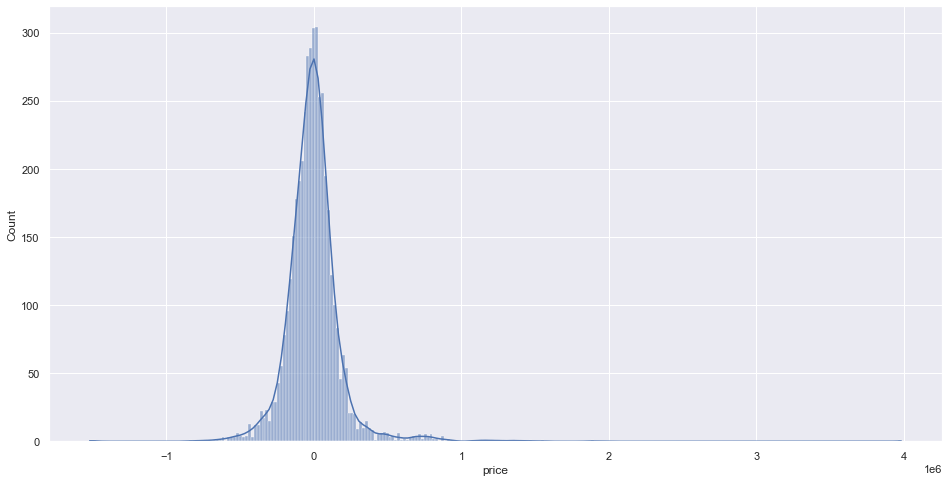

In [49]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.show()

import pylab 

stats.probplot(y, dist="norm", plot=pylab)
plt.show()

sns.histplot(residuals, kde=True);


## All-in Modified Cross-Validation

In [50]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(model_3, X, y, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_3, X, y, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_3, X, y, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.7199499665632915

0.72512616082297

0.7243653117651949

As expected, we've maximized our r2 at about 0.72 using 27 features. Just as predicted by the RFE. It's interesting that even though that function's prediction ended up correct, it could not be acheived using the features selected by its own algorithm. 
What could account for that? My guess is that its trained to deprioritize features that display collinearity, even if model accuracy in the end takes a hit.


# Transforming Data

We've noticed that in our assumption test plots, most of the output indicates less than perfect adherence to the regression assumptions. Our final model will employ a log(x+1) transformation to normalize our very skewed original dataset. This should bring it more into line with the assumptions.

In [51]:
df2 = np.log(abs(df1+1))
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,12.31,1.39,0.69,7.07,8.64,0.69,7.07,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00
1,13.20,1.39,1.18,7.85,8.89,1.10,7.68,11.49,3.89,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00
2,12.10,1.10,0.69,6.65,9.21,0.69,6.65,11.49,3.89,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00
3,13.31,1.61,1.39,7.58,8.52,0.69,6.96,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00
4,13.14,1.39,1.10,7.43,9.00,0.69,7.43,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.79,1.39,1.25,7.33,7.03,1.39,7.33,11.49,3.89,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00
21593,12.90,1.61,1.25,7.75,8.67,1.10,7.75,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00
21594,12.90,1.10,0.56,6.93,7.21,1.10,6.93,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00
21595,12.90,1.39,1.25,7.38,7.78,1.10,7.38,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00


# Transformed Data Model

We will now feed our transformed data into statsmodels and sklearn as we have above.

In [52]:
y = df2['price']
X = df2.drop('price', axis=1)

X1 = sm.add_constant(X)
model_4 = sm.OLS(y, X1).fit()
model_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     2188.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        06:48:12   Log-Likelihood:                -1175.5
No. Observations:               21596   AIC:                             2417.
Df Residuals:                   21563   BIC:                             2680.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 218.7543     43.824      4.992      0.000     132.855     304.653
bedrooms               -0.1215      0.012    -10.564      0.000      -0.144      -0.099
bathrooms               0.1038      0.013      8.024      0.000       0.078       0.129
sqft_living             0.3708      0.012     31.466      0.000       0.348       0.394
sqft_lot                0.0195      0.005      3.795      0.000       0.009       0.030
floors                  0.1324      0.013      9.892      0.000       0.106       0.159
sqft_above              0.0175      0.011      1.610      0.107      -0.004       0.039
zipcode               -50.3446      4.130    -12.189      0.000     -58.440     -42.249
lat                    69.0291      0.668    103.279      0.000      67.719      70.339
long                   21.0083      2.065     10.176      0.000      16.962      25.055
sqft_living15           0.2079      0.009     22.844      0.000       0.190       0.226
sqft_lot15             -0.0575      0.006    -10.417      0.000      -0.068      -0.047
recent_reno             0.2512      0.017     14.652      0.000       0.218       0.285
age                     0.1009      0.004     23.481      0.000       0.092       0.109
waterfront_YES          0.6045      0.037     16.138      0.000       0.531       0.678
view_EXCELLENT          0.1934      0.028      6.914      0.000       0.139       0.248
view_FAIR               0.0561      0.024      2.378      0.017       0.010       0.102
view_GOOD               0.0948      0.020      4.668      0.000       0.055       0.135
view_NONE              -0.2005      0.013    -15.900      0.000      -0.225      -0.176
condition_Fair         -0.1269      0.029     -4.400      0.000      -0.183      -0.070
condition_Good          0.1017      0.006     15.682      0.000       0.089       0.114
condition_Poor         -0.2655      0.069     -3.836      0.000      -0.401      -0.130
condition_Very Good     0.2234      0.010     21.886      0.000       0.203       0.243
grade_11 Excellent      0.2387      0.022     11.024      0.000       0.196       0.281
grade_12 Luxury         0.5532      0.041     13.466      0.000       0.473       0.634
grade_13 Mansion        1.0148      0.103      9.813      0.000       0.812       1.218
grade_3 Poor           -0.0908      0.370     -0.246      0.806      -0.816       0.634
grade_4 Low            -1.0572      0.074    -14.282      0.000      -1.202      -0.912
grade_5 Fair           -1.0244      0.030    -34.122      0.000      -1.083      -0.966
grade_6 Low Average    -0.8800      0.019    -47.027      0.000      -0.917      -0.843
grade_7 Average        -0.7238      0.015    -48.626      0.000      -0.753      -0.695
grade_8 Good           -0.5191      0.013    -39.002      0.000      -0.545      -0.493
gra

In [53]:
y = df2['price']
X = df2.drop(['price','sqft_above','grade_3 Poor'], axis=1)

X1 = sm.add_constant(X)
model_4 = sm.OLS(y, X1).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     2334.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        06:48:12   Log-Likelihood:                -1176.9
No. Observations:               21596   AIC:                             2416.
Df Residuals:                   21565   BIC:                             2663.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 225.1045     43.644      5.158      0.000     139.559     310.650
bedrooms               -0.1204      0.011    -10.483      0.000      -0.143      -0.098
bathrooms               0.1010      0.013      7.877      0.000       0.076       0.126
sqft_living             0.3817      0.010     39.461      0.000       0.363       0.401
sqft_lot                0.0204      0.005      4.010      0.000       0.010       0.030
floors                  0.1432      0.012     12.360      0.000       0.120       0.166
zipcode               -50.7148      4.124    -12.297      0.000     -58.798     -42.631
lat                    68.9456      0.666    103.527      0.000      67.640      70.251
long                   20.6438      2.051     10.064      0.000      16.623      24.664
sqft_living15           0.2093      0.009     23.100      0.000       0.192       0.227
sqft_lot15             -0.0575      0.006    -10.421      0.000      -0.068      -0.047
recent_reno             0.2512      0.017     14.655      0.000       0.218       0.285
age                     0.1006      0.004     23.434      0.000       0.092       0.109
waterfront_YES          0.6048      0.037     16.145      0.000       0.531       0.678
view_EXCELLENT          0.1928      0.028      6.892      0.000       0.138       0.248
view_FAIR               0.0562      0.024      2.382      0.017       0.010       0.102
view_GOOD               0.0942      0.020      4.638      0.000       0.054       0.134
view_NONE              -0.1993      0.013    -15.831      0.000      -0.224      -0.175
condition_Fair         -0.1271      0.029     -4.408      0.000      -0.184      -0.071
condition_Good          0.1014      0.006     15.640      0.000       0.089       0.114
condition_Poor         -0.2651      0.069     -3.830      0.000      -0.401      -0.129
condition_Very Good     0.2225      0.010     21.832      0.000       0.203       0.242
grade_11 Excellent      0.2402      0.022     11.103      0.000       0.198       0.283
grade_12 Luxury         0.5557      0.041     13.535      0.000       0.475       0.636
grade_13 Mansion        1.0213      0.103      9.884      0.000       0.819       1.224
grade_4 Low            -1.0645      0.074    -14.411      0.000      -1.209      -0.920
grade_5 Fair           -1.0289      0.030    -34.461      0.000      -1.087      -0.970
grade_6 Low Average    -0.8835      0.019    -47.646      0.000      -0.920      -0.847
grade_7 Average        -0.7271      0.015    -49.468      0.000      -0.756      -0.698
grade_8 Good           -0.5217      0.013    -39.565      0.000      -0.548      -0.496
grade_9 Better         -0.2381      0.013    -17.852      0.000      -0.264      -0.212
==============================================================================
Omnibus:    

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_4 = LinearRegression()
results = model_4.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_4.coef_})
coef_df

y_predict = model_4.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)

print('The intercept is:', model_4.intercept_)
print('R-squared Score:', r2_score(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

,Feature,Coefficient
0,bedrooms,-0.12
1,bathrooms,0.10
2,sqft_living,0.38
3,sqft_lot,0.02
4,floors,0.15
5,zipcode,-50.26
6,lat,68.70
7,long,19.87
8,sqft_living15,0.22
9,sqft_lot15,-0.06


,Actual,Predicted,Residual
3686,11,12,0
10247,12,12,0
4037,13,12,0
3437,12,12,0
19291,13,12,0
...,...,...,...
2522,12,12,0
11119,12,12,0
11973,12,12,0
17601,12,12,0


The intercept is: 224.4224663957425
R-squared Score: 0.752920847254426
Mean Absolute Error: 0.20210810145645017
Mean Squared Error: 0.0674668247597504
Root Mean Squared Error: 0.25974376750896333


## Transformed Model Predictions and Assumptions Tests

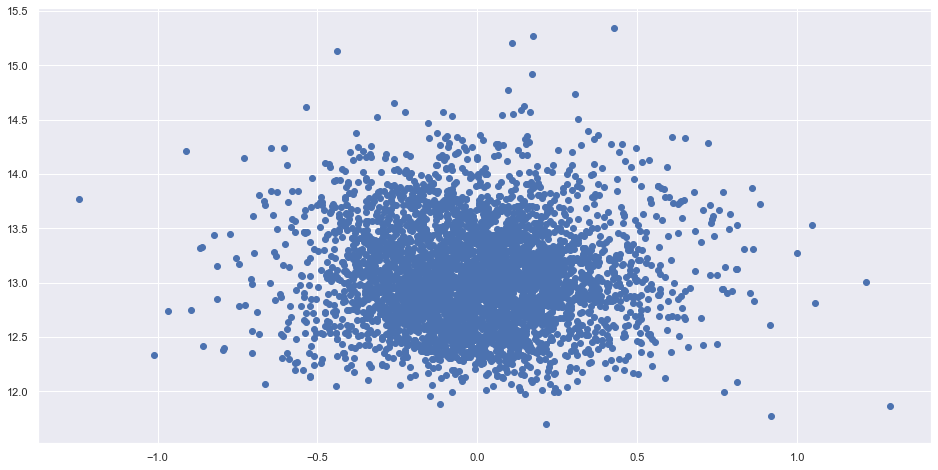

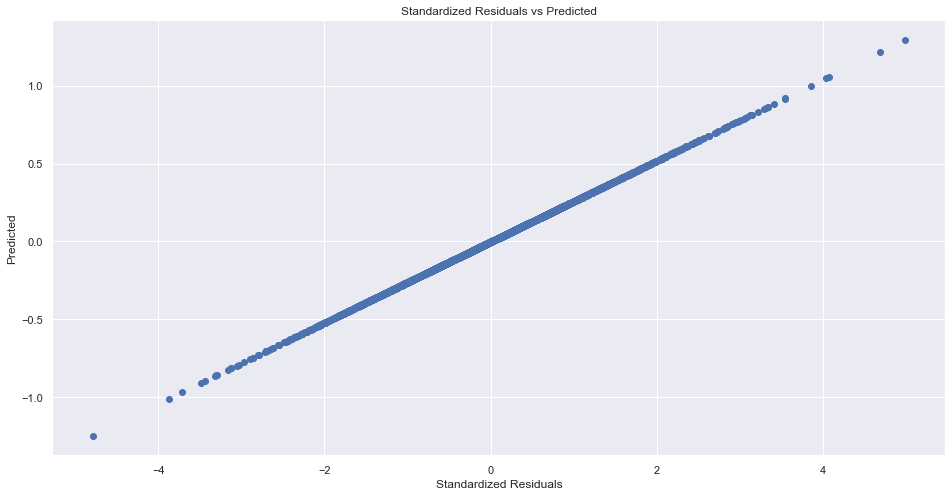

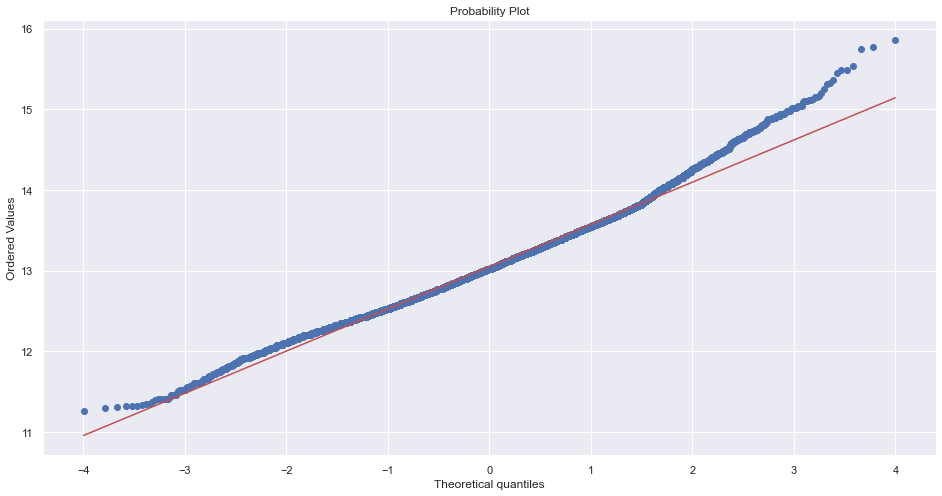

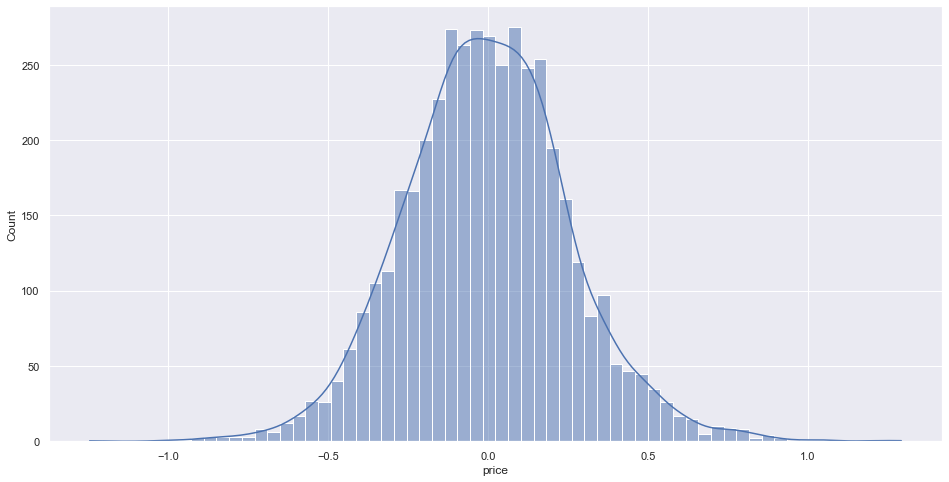

In [55]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.xlabel('Standardized Residuals')
plt.ylabel('Predicted')
plt.title('Standardized Residuals vs Predicted')
plt.show()

import pylab 

stats.probplot(y, dist="norm", plot=pylab)
plt.show()

sns.histplot(residuals, kde=True);


## Transformed Model Cross-Validation

In [56]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(model_4, X, y, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_4, X, y, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_4, X, y, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.7634310002783188

0.763257712176205

0.7633798856123969

That is quite a difference! Particularly with respect to the test of heteroskedasticity and normality. It had little effect, however, on our scores.

Data transformation can be useful, but it can add complexity to interpretation. With that in mind, we will transform this last model back into its original form by reversing the log(x+1) operation.

# Transformed Model Back-Transformation

In [57]:
X1 = np.exp(X)-1
y1 = np.exp(y)-1

X2 = sm.add_constant(X1)
model_5 = sm.OLS(y1, X2).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     1964.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        06:48:14   Log-Likelihood:            -2.9315e+05
No. Observations:               21596   AIC:                         5.864e+05
Df Residuals:                   21565   BIC:                         5.866e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.778e+06   2.72e+06      2.128      0.033    4.56e+05    1.11e+07
bedrooms            -2.234e+04   1915.411    -11.661      0.000   -2.61e+04   -1.86e+04
bathrooms            4.272e+04   3080.137     13.868      0.000    3.67e+04    4.88e+04
sqft_living           133.6693      3.281     40.746      0.000     127.239     140.099
sqft_lot                0.1319      0.045      2.908      0.004       0.043       0.221
floors               2.774e+04   3096.943      8.958      0.000    2.17e+04    3.38e+04
zipcode              -604.3151     31.385    -19.255      0.000    -665.832    -542.799
lat                  6.153e+05   1.01e+04     60.798      0.000    5.96e+05    6.35e+05
long                 2.045e+05   1.23e+04     16.633      0.000     1.8e+05    2.29e+05
sqft_living15          28.3109      3.267      8.665      0.000      21.907      34.715
sqft_lot15             -0.3835      0.069     -5.529      0.000      -0.519      -0.248
recent_reno          1.069e+05   8844.171     12.091      0.000    8.96e+04    1.24e+05
age                  2164.1767     68.739     31.484      0.000    2029.443    2298.910
waterfront_YES       5.533e+05   1.93e+04     28.669      0.000    5.16e+05    5.91e+05
view_EXCELLENT       1.883e+05   1.44e+04     13.044      0.000     1.6e+05    2.17e+05
view_FAIR            4.753e+04   1.22e+04      3.905      0.000    2.37e+04    7.14e+04
view_GOOD            6.509e+04   1.05e+04      6.206      0.000    4.45e+04    8.57e+04
view_NONE           -7.146e+04   6494.084    -11.004      0.000   -8.42e+04   -5.87e+04
condition_Fair      -6964.4430   1.49e+04     -0.469      0.639   -3.61e+04    2.22e+04
condition_Good       3.119e+04   3299.196      9.455      0.000    2.47e+04    3.77e+04
condition_Poor      -6.881e+04   3.57e+04     -1.928      0.054   -1.39e+05    1146.833
condition_Very Good  7.279e+04   5251.788     13.859      0.000    6.25e+04    8.31e+04
grade_11 Excellent   2.452e+05   1.13e+04     21.678      0.000    2.23e+05    2.67e+05
grade_12 Luxury      7.008e+05   2.16e+04     32.440      0.000    6.58e+05    7.43e+05
grade_13 Mansion     1.899e+06   5.41e+04     35.091      0.000    1.79e+06       2e+06
grade_4 Low         -3.925e+05   3.79e+04    -10.345      0.000   -4.67e+05   -3.18e+05
grade_5 Fair        -4.047e+05   1.54e+04    -26.265      0.000   -4.35e+05   -3.74e+05
grade_6 Low Average -3.777e+05   9738.920    -38.779      0.000   -3.97e+05   -3.59e+05
grade_7 Average      -3.39e+05   7981.500    -42.477      0.000   -3.55e+05   -3.23e+05
grade_8 Good        -2.802e+05   7148.672    -39.196      0.000   -2.94e+05   -2.66e+05
grade_9 Better      -1.612e+05   6989.724    -23.067      0.000   -1.75e+05   -1.48e+05
==============================================================================
Omnibus:    

In [58]:
y2 = df2['price']
X2 = df2.drop(['price','sqft_above','grade_3 Poor','condition_Poor','condition_Fair'], axis=1)



In [59]:
X3 = np.exp(X2)-1
y3 = np.exp(y2)-1

X4 = sm.add_constant(X3)
model_5 = sm.OLS(y3, X4).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2104.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        06:48:14   Log-Likelihood:            -2.9316e+05
No. Observations:               21596   AIC:                         5.864e+05
Df Residuals:                   21567   BIC:                         5.866e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.735e+06   2.72e+06      2.112      0.035    4.13e+05    1.11e+07
bedrooms            -2.231e+04   1915.462    -11.649      0.000   -2.61e+04   -1.86e+04
bathrooms            4.272e+04   3080.270     13.869      0.000    3.67e+04    4.88e+04
sqft_living           133.7201      3.281     40.761      0.000     127.290     140.150
sqft_lot                0.1300      0.045      2.868      0.004       0.041       0.219
floors               2.775e+04   3096.522      8.961      0.000    2.17e+04    3.38e+04
zipcode              -603.5118     31.384    -19.230      0.000    -665.026    -541.998
lat                  6.153e+05   1.01e+04     60.809      0.000    5.96e+05    6.35e+05
long                 2.042e+05   1.23e+04     16.610      0.000     1.8e+05    2.28e+05
sqft_living15          28.1209      3.266      8.610      0.000      21.719      34.523
sqft_lot15             -0.3819      0.069     -5.506      0.000      -0.518      -0.246
recent_reno          1.071e+05   8841.340     12.119      0.000    8.98e+04    1.24e+05
age                  2158.4168     68.624     31.453      0.000    2023.909    2292.924
waterfront_YES       5.532e+05   1.93e+04     28.661      0.000    5.15e+05    5.91e+05
view_EXCELLENT       1.879e+05   1.44e+04     13.017      0.000     1.6e+05    2.16e+05
view_FAIR            4.735e+04   1.22e+04      3.890      0.000    2.35e+04    7.12e+04
view_GOOD            6.506e+04   1.05e+04      6.203      0.000    4.45e+04    8.56e+04
view_NONE           -7.158e+04   6493.948    -11.023      0.000   -8.43e+04   -5.89e+04
condition_Good        3.16e+04   3282.247      9.627      0.000    2.52e+04     3.8e+04
condition_Very Good  7.326e+04   5238.539     13.984      0.000     6.3e+04    8.35e+04
grade_11 Excellent   2.453e+05   1.13e+04     21.683      0.000    2.23e+05    2.67e+05
grade_12 Luxury       7.01e+05   2.16e+04     32.446      0.000    6.59e+05    7.43e+05
grade_13 Mansion     1.899e+06   5.41e+04     35.091      0.000    1.79e+06       2e+06
grade_4 Low         -3.959e+05   3.79e+04    -10.455      0.000    -4.7e+05   -3.22e+05
grade_5 Fair        -4.076e+05   1.53e+04    -26.586      0.000   -4.38e+05   -3.78e+05
grade_6 Low Average -3.782e+05   9733.252    -38.861      0.000   -3.97e+05   -3.59e+05
grade_7 Average     -3.392e+05   7981.287    -42.501      0.000   -3.55e+05   -3.24e+05
grade_8 Good        -2.803e+05   7148.597    -39.214      0.000   -2.94e+05   -2.66e+05
grade_9 Better      -1.613e+05   6989.936    -23.074      0.000   -1.75e+05   -1.48e+05
==============================================================================
Omnibus:                    14434.421   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           778617.998
Skew:                         

In [60]:
from scipy import stats
lm = LinearRegression()
lm.fit(X3,y3)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X3)
new_X = np.append(np.ones((len(X3),1)), X3, axis=1)
M_S_E = (sum((y3-predictions)**2))/(len(new_X)-len(new_X[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(new_X.T,new_X)).diagonal())
s_b = np.sqrt(v_b)
t_b = params/ s_b
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(new_X)-len(new_X[0])))) for i in t_b]
p_val = np.round(p_val,3)
p_val

LinearRegression()

array([0.035, 0.   , 0.   , 0.   , 0.004, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model_5 = LinearRegression()
model_5.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_5.coef_})
coef_df

y_predict = model_5.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)

print('The intercept is:', model_5.intercept_)
print('R-squared Score:', r2_score(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

LinearRegression()

,Feature,Coefficient
0,bedrooms,-21268.41
1,bathrooms,43318.34
2,sqft_living,127.86
3,sqft_lot,0.13
4,floors,27805.38
5,zipcode,-584.97
6,lat,609107.92
7,long,199223.68
8,sqft_living15,34.45
9,sqft_lot15,-0.46


,Actual,Predicted,Residual
3686,132499,148765,-16265
10247,415000,441314,-26314
4037,494000,221415,272584
3437,354999,405291,-50291
19291,605999,434383,171616
...,...,...,...
2522,175000,176828,-1828
11119,394950,384666,10283
11973,437000,485126,-48126
17601,293000,318930,-25930


The intercept is: 4801244.887351019
R-squared Score: 0.7138435604104464
Mean Absolute Error: 119831.42712510035
Mean Squared Error: 37490217123.32161
Root Mean Squared Error: 193623.90638379758


## Back-Transformed Predictions and Assumptions Tests

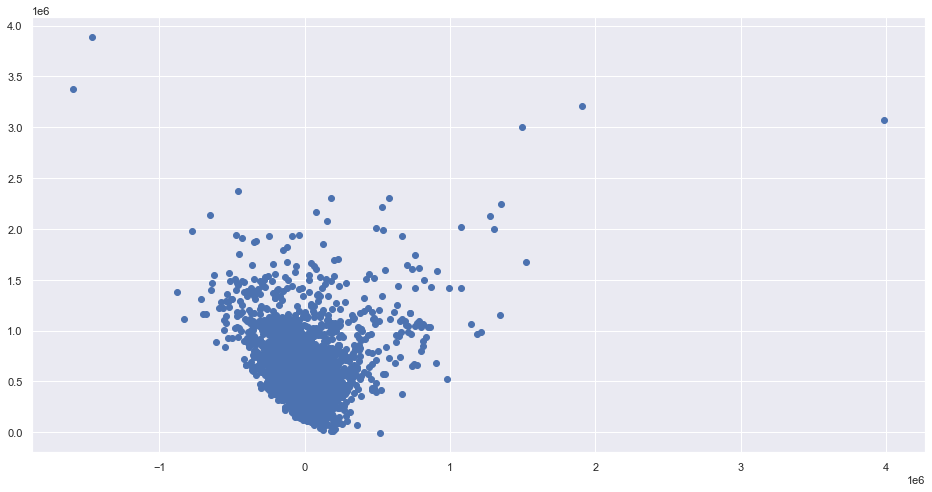

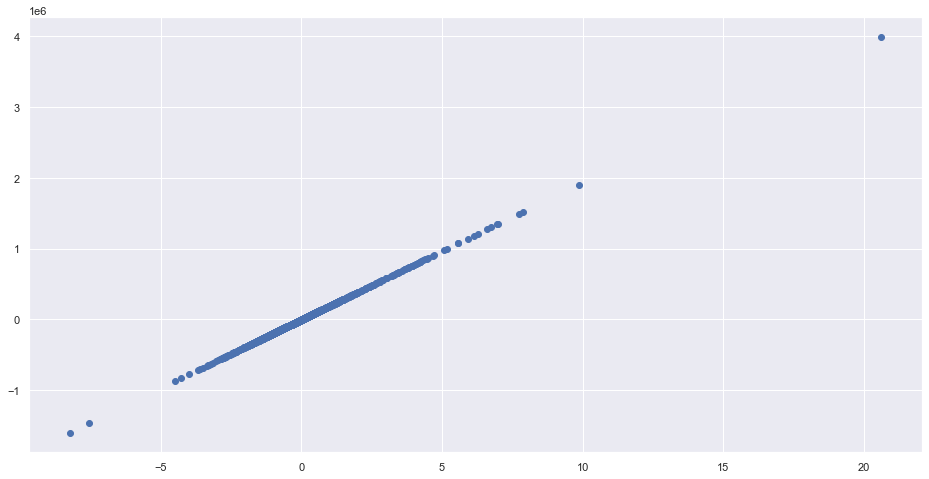

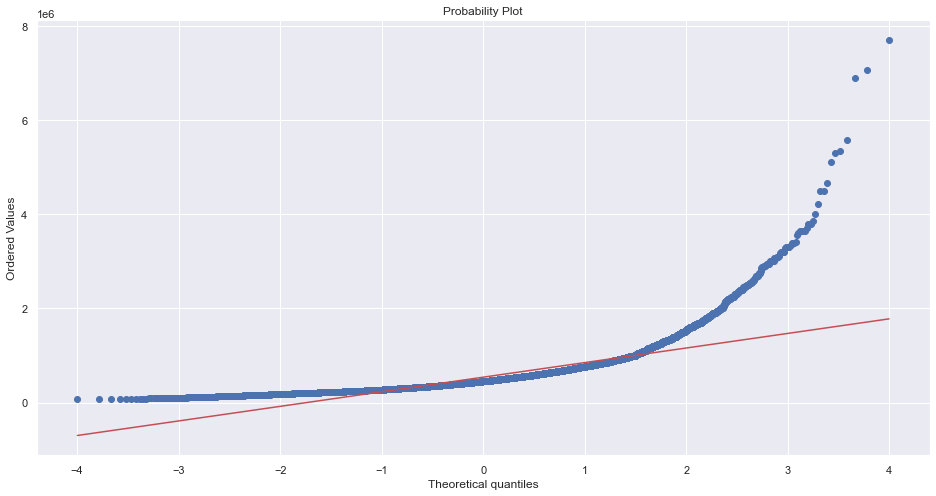

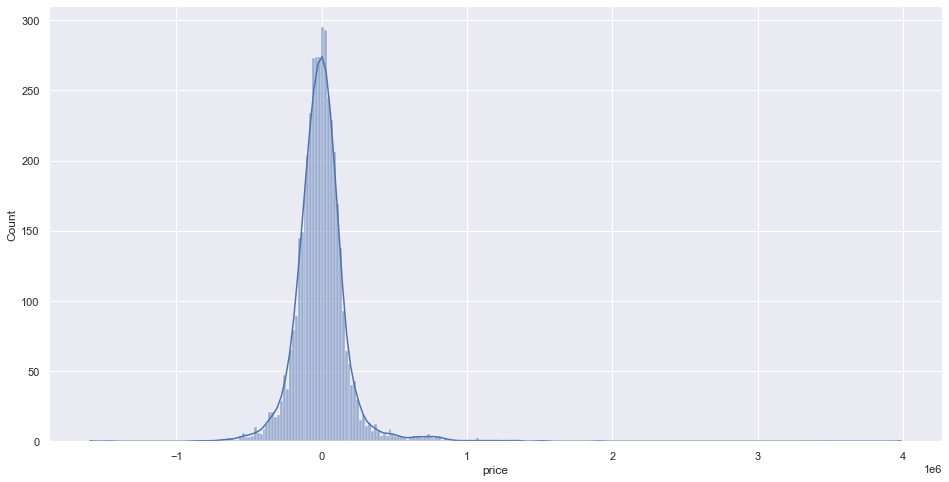

In [62]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.show()

import pylab 

stats.probplot(y1, dist="norm", plot=pylab)
plt.show()

sns.histplot(residuals, kde=True);


## Back-Transformed Model Cross Validation

In [63]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(model_5, X1, y1, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_5, X1, y1, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_5, X1, y1, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.7197464433200964

0.7287886612653093

0.7283636577683292

In the end, model_4 was the most accurate, and it will be the model we use to address our business problem.

# The Winning Model

In [64]:
y = df2['price']
X = df2.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_4 = LinearRegression()
model_4.fit(X_train, y_train)

y_predict = model_4.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_4.coef_})
coef_df

LinearRegression()

,Actual,Predicted,Residual
3686,11,12,0
10247,12,12,0
4037,13,12,0
3437,12,12,0
19291,13,12,0
...,...,...,...
2522,12,12,0
11119,12,12,0
11973,12,12,0
17601,12,12,0


,Feature,Coefficient
0,bedrooms,-0.12
1,bathrooms,0.10
2,sqft_living,0.36
3,sqft_lot,0.02
4,floors,0.13
5,sqft_above,0.02
6,zipcode,-49.78
7,lat,68.82
8,long,20.30
9,sqft_living15,0.22


In [65]:
cv_5_results
cv_10_results
cv_20_results

0.7197464433200964

0.7287886612653093

0.7283636577683292

# Analysis

As noted at the beginning of the modeling phase, the square footage of the property is a huge influence on the overall price. Our model indicates that for each unit increase in square footage, the sale price rises by at least $133.09. The bigger the house, the higher the price. So the answer to which feature exerts the greatest influence on price is sqft_living.

Conversely, for each bedroom, a property loses $20487.81! One might think that as the number of bedrooms increases, so too would square footage, and thus price, but our model indicates that that's just not the case.

As for which features, taken together, would be most convenient and powerful to provide the best rough estimates, those include sqft_living, bedrooms, bathrooms, waterfront_YES, and view.

Interestingly, the categorical coefficients (grade, condition, view, and waterfront) don't function quite the same. Since any given home can be part of only one category (that is, it can only have one grade, one condition, one view, and either have a waterfront or not), the coefficients there behave almost like constants. 

The geographical variables are also interesting. For regression purposes they're essentially meaningless. For instance, latitude's coefficient is 606196.19. But what does that mean? The coefficient is the same regardless of latitude. If price does not vary based on this data, should it be included? 

Users may not be able to provide an answer for potential questions like "what is the condition of your home?" or "what is your property's grade?". In the future, we may look at binning these categories to make them more broad and less sensitive to misidentification. 

Model_4's RMSE is 193634. This is the smallest among the models, so we will select this one for use.